# 05 — Build All Zones

**Phase 2a: Feature Engineering — Build & Cache**

This notebook builds and caches feature matrices for **all 5 Norwegian bidding zones** in one go. Run this once to prepare all data for modeling.

## Zones

| Zone | Region | City | Weather station |
|------|--------|------|----------------|
| NO_1 | Øst-Norge | Oslo | SN18700 (Blindern) |
| NO_2 | Sør-Norge | Kristiansand | SN39040 (Kjevik) |
| NO_3 | Midt-Norge | Trondheim | SN68860 (Voll) |
| NO_4 | Nord-Norge | Tromsø | SN90450 |
| NO_5 | Vest-Norge | Bergen | SN50540 (Florida) |

In [1]:
import sys
import time
from pathlib import Path

PROJECT_ROOT = str(Path.cwd().parent) if Path("../src").exists() else str(Path.cwd())
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

import logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(name)s %(levelname)s %(message)s")

from src.features.build_features import (
    build_all_zones_feature_matrix, plot_feature_summary,
    ALL_ZONES, ZONE_LABELS,
)

START, END = "2020-01-01", "2026-02-21"

## Build all zones

This fetches weather data for any zones that aren't cached yet (requires Frost API key in `.env`), then builds the full feature matrix for each zone.

In [2]:
t0 = time.time()
all_dfs = build_all_zones_feature_matrix(START, END)
elapsed = time.time() - t0

print(f"\nDone in {elapsed:.1f}s — built {len(all_dfs)}/{len(ALL_ZONES)} zones")

2026-02-23 00:00:13,647 src.features.build_features INFO Building features for NO_1 (Øst-Norge (Oslo))


2026-02-23 00:00:13,648 src.features.build_features INFO Building feature matrix for NO_1 (2020-01-01 to 2026-02-21)


2026-02-23 00:00:13,854 src.features.build_features INFO Calendar features: 53833 rows, 7 columns


2026-02-23 00:00:13,855 src.data.fetch_metro INFO Loading cached weather data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/weather_NO_1_2020-01-01_2026-02-21.parquet


2026-02-23 00:00:13,907 src.features.build_features INFO Weather features (NO_1): 53688 rows, 5 columns


2026-02-23 00:00:13,908 src.features.build_features INFO Merged weather: +5 columns


2026-02-23 00:00:13,909 src.data.fetch_fx INFO Loading cached FX data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/fx_eur_nok_2020-01-01_2026-02-21.parquet


2026-02-23 00:00:13,910 src.features.build_features INFO FX features: 2244 rows, 1 columns


2026-02-23 00:00:13,918 src.features.build_features INFO Merged FX: +1 columns


2026-02-23 00:00:13,918 src.features.build_features INFO Price features: skipped (no price data provided)


2026-02-23 00:00:13,918 src.data.fetch_nordpool INFO Fetching prices for NO_1 (2020-01-01 to 2026-02-21)


2026-02-23 00:00:13,919 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2020


2026-02-23 00:00:13,920 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2021


2026-02-23 00:00:13,922 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2022


2026-02-23 00:00:13,923 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2023


2026-02-23 00:00:13,924 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2024


2026-02-23 00:00:13,925 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2025


2026-02-23 00:00:13,926 src.data.fetch_nordpool INFO Fetching prices for NO_1: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:00:35,815 src.data.fetch_nordpool INFO Fetched NO_1 2026: 52 days, 1248 rows


2026-02-23 00:00:35,818 src.data.fetch_nordpool INFO Prices NO_1: 39984 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:00:35,818 src.data.fetch_nordpool INFO Fetching prices for NO_2 (2020-01-01 to 2026-02-21)


2026-02-23 00:00:35,819 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2020


2026-02-23 00:00:35,822 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2021


2026-02-23 00:00:35,825 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2022


2026-02-23 00:00:35,827 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2023


2026-02-23 00:00:35,830 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2024


2026-02-23 00:00:35,833 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2025


2026-02-23 00:00:35,835 src.data.fetch_nordpool INFO Fetching prices for NO_2: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:00:57,311 src.data.fetch_nordpool INFO Fetched NO_2 2026: 52 days, 1248 rows


2026-02-23 00:00:57,314 src.data.fetch_nordpool INFO Prices NO_2: 39024 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:00:57,314 src.data.fetch_nordpool INFO Fetching prices for NO_3 (2020-01-01 to 2026-02-21)


2026-02-23 00:00:57,314 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2020


2026-02-23 00:00:57,319 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2021


2026-02-23 00:00:57,322 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2022


2026-02-23 00:00:57,325 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2023


2026-02-23 00:00:57,328 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2024


2026-02-23 00:00:57,330 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2025


2026-02-23 00:00:57,332 src.data.fetch_nordpool INFO Fetching prices for NO_3: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:01:17,335 src.data.fetch_nordpool INFO Fetched NO_3 2026: 52 days, 1248 rows


2026-02-23 00:01:17,338 src.data.fetch_nordpool INFO Prices NO_3: 39216 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:01:17,338 src.data.fetch_nordpool INFO Fetching prices for NO_4 (2020-01-01 to 2026-02-21)


2026-02-23 00:01:17,338 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2020


2026-02-23 00:01:17,343 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2021


2026-02-23 00:01:17,345 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2022


2026-02-23 00:01:17,347 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2023


2026-02-23 00:01:17,350 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2024


2026-02-23 00:01:17,352 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2025


2026-02-23 00:01:17,354 src.data.fetch_nordpool INFO Fetching prices for NO_4: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:01:38,290 src.data.fetch_nordpool INFO Fetched NO_4 2026: 52 days, 1248 rows


2026-02-23 00:01:38,293 src.data.fetch_nordpool INFO Prices NO_4: 37919 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:01:38,293 src.data.fetch_nordpool INFO Fetching prices for NO_5 (2020-01-01 to 2026-02-21)


2026-02-23 00:01:38,294 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2020


2026-02-23 00:01:38,298 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2021


2026-02-23 00:01:38,300 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2022


2026-02-23 00:01:38,303 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2023


2026-02-23 00:01:38,307 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2024


2026-02-23 00:01:38,310 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2025


2026-02-23 00:01:38,313 src.data.fetch_nordpool INFO Fetching prices for NO_5: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:01:58,320 src.data.fetch_nordpool INFO Fetched NO_5 2026: 52 days, 1248 rows


2026-02-23 00:01:58,322 src.data.fetch_nordpool INFO Prices NO_5: 39360 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:01:58,334 src.data.fetch_nordpool INFO Total prices: 41089 rows x 5 zones, 9942 missing values


2026-02-23 00:01:58,340 src.features.build_features INFO Price features: 41089 rows, 8 columns


2026-02-23 00:01:58,342 src.features.build_features INFO Added NOK price columns (price_nok_mwh, price_nok_kwh)


2026-02-23 00:01:58,342 src.features.build_features INFO Nord Pool price features (NO_1): 41089 rows, 11 columns


2026-02-23 00:01:58,345 src.features.build_features INFO Merged Nord Pool price features: +11 columns


2026-02-23 00:01:58,352 src.features.build_features INFO NOK price features: 53833 rows, 16 columns


2026-02-23 00:01:58,353 src.features.build_features INFO Merged NOK price features: +16 columns


2026-02-23 00:01:58,353 src.data.fetch_commodity INFO Loading cached commodity data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/commodity_yfinance_2020-01-01_2026-02-21.parquet


2026-02-23 00:01:58,360 src.features.build_features INFO Commodity features: 2244 rows, 5 columns


2026-02-23 00:01:58,370 src.features.build_features INFO Merged commodities: +5 columns


2026-02-23 00:01:58,371 src.data.fetch_statnett INFO Loading cached physical flows from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_physical_flows.parquet


2026-02-23 00:01:58,374 src.data.fetch_statnett INFO Loading cached production/consumption from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_prod_cons.parquet


2026-02-23 00:01:58,377 src.features.build_features INFO Statnett features: 2244 rows, 4 columns


2026-02-23 00:01:58,428 src.features.build_features INFO Merged Statnett: +4 columns


2026-02-23 00:01:58,428 src.data.fetch_reservoir INFO Loading cached reservoir data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_all.parquet


2026-02-23 00:01:58,433 src.data.fetch_reservoir INFO Loading cached benchmark data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_benchmarks.parquet


2026-02-23 00:01:58,448 src.features.build_features INFO Reservoir features (NO_1): 320 rows, 5 columns


2026-02-23 00:01:58,450 src.features.build_features INFO Merged reservoir: +5 columns


2026-02-23 00:01:58,459 src.features.build_features INFO Feature matrix: 53833 rows x 54 columns, 219059 total missing values


2026-02-23 00:01:58,460 src.features.build_features INFO   temperature: 1 missing (0.0%)


2026-02-23 00:01:58,460 src.features.build_features INFO   wind_speed: 1 missing (0.0%)


2026-02-23 00:01:58,461 src.features.build_features INFO   precipitation: 1 missing (0.0%)


2026-02-23 00:01:58,461 src.features.build_features INFO   temperature_lag_24h: 25 missing (0.0%)


2026-02-23 00:01:58,461 src.features.build_features INFO   temperature_rolling_24h_mean: 1 missing (0.0%)


2026-02-23 00:01:58,461 src.features.build_features INFO   price_eur_mwh: 8040 missing (14.9%)


2026-02-23 00:01:58,461 src.features.build_features INFO   price_lag_1h: 8041 missing (14.9%)


2026-02-23 00:01:58,461 src.features.build_features INFO   price_lag_24h: 8064 missing (15.0%)


2026-02-23 00:01:58,461 src.features.build_features INFO   price_lag_168h: 8256 missing (15.3%)


2026-02-23 00:01:58,462 src.features.build_features INFO   price_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:01:58,462 src.features.build_features INFO   price_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:01:58,462 src.features.build_features INFO   price_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:01:58,462 src.features.build_features INFO   price_diff_24h: 8064 missing (15.0%)


2026-02-23 00:01:58,462 src.features.build_features INFO   price_diff_168h: 8256 missing (15.3%)


2026-02-23 00:01:58,462 src.features.build_features INFO   price_nok_mwh: 8040 missing (14.9%)


2026-02-23 00:01:58,462 src.features.build_features INFO   price_nok_kwh: 8040 missing (14.9%)


2026-02-23 00:01:58,463 src.features.build_features INFO   price_nok_mwh_lag_1h: 8041 missing (14.9%)


2026-02-23 00:01:58,463 src.features.build_features INFO   price_nok_mwh_lag_24h: 8064 missing (15.0%)


2026-02-23 00:01:58,463 src.features.build_features INFO   price_nok_mwh_lag_168h: 8208 missing (15.2%)


2026-02-23 00:01:58,463 src.features.build_features INFO   price_nok_mwh_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:01:58,463 src.features.build_features INFO   price_nok_mwh_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:01:58,463 src.features.build_features INFO   price_nok_mwh_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:01:58,463 src.features.build_features INFO   price_nok_mwh_diff_24h: 8064 missing (15.0%)


2026-02-23 00:01:58,464 src.features.build_features INFO   price_nok_mwh_diff_168h: 8232 missing (15.3%)


2026-02-23 00:01:58,464 src.features.build_features INFO   price_nok_kwh_lag_1h: 8041 missing (14.9%)


2026-02-23 00:01:58,464 src.features.build_features INFO   price_nok_kwh_lag_24h: 8064 missing (15.0%)


2026-02-23 00:01:58,464 src.features.build_features INFO   price_nok_kwh_lag_168h: 8208 missing (15.2%)


2026-02-23 00:01:58,464 src.features.build_features INFO   price_nok_kwh_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:01:58,464 src.features.build_features INFO   price_nok_kwh_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:01:58,464 src.features.build_features INFO   price_nok_kwh_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:01:58,465 src.features.build_features INFO   price_nok_kwh_diff_24h: 8064 missing (15.0%)


2026-02-23 00:01:58,465 src.features.build_features INFO   price_nok_kwh_diff_168h: 8232 missing (15.3%)


2026-02-23 00:01:58,465 src.features.build_features INFO   ttf_gas_change_7d: 168 missing (0.3%)


2026-02-23 00:01:58,465 src.features.build_features INFO   reservoir_filling_pct: 96 missing (0.2%)


2026-02-23 00:01:58,465 src.features.build_features INFO   reservoir_filling_twh: 96 missing (0.2%)


2026-02-23 00:01:58,465 src.features.build_features INFO   reservoir_filling_change: 96 missing (0.2%)


2026-02-23 00:01:58,466 src.features.build_features INFO   reservoir_vs_median: 96 missing (0.2%)


2026-02-23 00:01:58,466 src.features.build_features INFO   reservoir_vs_min: 96 missing (0.2%)


2026-02-23 00:01:58,563 src.features.build_features INFO Cached feature matrix to /Users/martin/Documents/GitHub/electricity_forecast/data/processed/features_NO_1_2020-01-01_2026-02-21.parquet


2026-02-23 00:01:58,565 src.features.build_features INFO Building features for NO_2 (Sør-Norge (Kristiansand))


2026-02-23 00:01:58,565 src.features.build_features INFO Building feature matrix for NO_2 (2020-01-01 to 2026-02-21)


2026-02-23 00:01:58,706 src.features.build_features INFO Calendar features: 53833 rows, 7 columns


2026-02-23 00:01:58,706 src.data.fetch_metro INFO Loading cached weather data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/weather_NO_2_2020-01-01_2026-02-21.parquet


2026-02-23 00:01:58,710 src.features.build_features INFO Weather features (NO_2): 53688 rows, 5 columns


2026-02-23 00:01:58,712 src.features.build_features INFO Merged weather: +5 columns


2026-02-23 00:01:58,712 src.data.fetch_fx INFO Loading cached FX data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/fx_eur_nok_2020-01-01_2026-02-21.parquet


2026-02-23 00:01:58,714 src.features.build_features INFO FX features: 2244 rows, 1 columns


2026-02-23 00:01:58,721 src.features.build_features INFO Merged FX: +1 columns


2026-02-23 00:01:58,722 src.features.build_features INFO Price features: skipped (no price data provided)


2026-02-23 00:01:58,722 src.data.fetch_nordpool INFO Fetching prices for NO_1 (2020-01-01 to 2026-02-21)


2026-02-23 00:01:58,722 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2020


2026-02-23 00:01:58,724 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2021


2026-02-23 00:01:58,725 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2022


2026-02-23 00:01:58,727 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2023


2026-02-23 00:01:58,728 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2024


2026-02-23 00:01:58,730 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2025


2026-02-23 00:01:58,732 src.data.fetch_nordpool INFO Fetching prices for NO_1: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:02:18,799 src.data.fetch_nordpool INFO Fetched NO_1 2026: 52 days, 1248 rows


2026-02-23 00:02:18,802 src.data.fetch_nordpool INFO Prices NO_1: 39984 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:02:18,802 src.data.fetch_nordpool INFO Fetching prices for NO_2 (2020-01-01 to 2026-02-21)


2026-02-23 00:02:18,803 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2020


2026-02-23 00:02:18,807 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2021


2026-02-23 00:02:18,810 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2022


2026-02-23 00:02:18,812 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2023


2026-02-23 00:02:18,815 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2024


2026-02-23 00:02:18,817 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2025


2026-02-23 00:02:18,819 src.data.fetch_nordpool INFO Fetching prices for NO_2: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:02:38,718 src.data.fetch_nordpool INFO Fetched NO_2 2026: 52 days, 1248 rows


2026-02-23 00:02:38,720 src.data.fetch_nordpool INFO Prices NO_2: 39024 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:02:38,721 src.data.fetch_nordpool INFO Fetching prices for NO_3 (2020-01-01 to 2026-02-21)


2026-02-23 00:02:38,721 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2020


2026-02-23 00:02:38,725 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2021


2026-02-23 00:02:38,727 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2022


2026-02-23 00:02:38,730 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2023


2026-02-23 00:02:38,733 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2024


2026-02-23 00:02:38,735 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2025


2026-02-23 00:02:38,738 src.data.fetch_nordpool INFO Fetching prices for NO_3: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:02:58,846 src.data.fetch_nordpool INFO Fetched NO_3 2026: 52 days, 1248 rows


2026-02-23 00:02:58,848 src.data.fetch_nordpool INFO Prices NO_3: 39216 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:02:58,849 src.data.fetch_nordpool INFO Fetching prices for NO_4 (2020-01-01 to 2026-02-21)


2026-02-23 00:02:58,849 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2020


2026-02-23 00:02:58,853 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2021


2026-02-23 00:02:58,856 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2022


2026-02-23 00:02:58,858 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2023


2026-02-23 00:02:58,861 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2024


2026-02-23 00:02:58,863 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2025


2026-02-23 00:02:58,865 src.data.fetch_nordpool INFO Fetching prices for NO_4: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:03:18,740 src.data.fetch_nordpool INFO Fetched NO_4 2026: 52 days, 1248 rows


2026-02-23 00:03:18,742 src.data.fetch_nordpool INFO Prices NO_4: 37919 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:03:18,743 src.data.fetch_nordpool INFO Fetching prices for NO_5 (2020-01-01 to 2026-02-21)


2026-02-23 00:03:18,743 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2020


2026-02-23 00:03:18,747 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2021


2026-02-23 00:03:18,750 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2022


2026-02-23 00:03:18,753 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2023


2026-02-23 00:03:18,755 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2024


2026-02-23 00:03:18,758 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2025


2026-02-23 00:03:18,759 src.data.fetch_nordpool INFO Fetching prices for NO_5: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:03:38,604 src.data.fetch_nordpool INFO Fetched NO_5 2026: 52 days, 1248 rows


2026-02-23 00:03:38,607 src.data.fetch_nordpool INFO Prices NO_5: 39360 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:03:38,622 src.data.fetch_nordpool INFO Total prices: 41089 rows x 5 zones, 9942 missing values


2026-02-23 00:03:38,627 src.features.build_features INFO Price features: 41089 rows, 8 columns


2026-02-23 00:03:38,630 src.features.build_features INFO Added NOK price columns (price_nok_mwh, price_nok_kwh)


2026-02-23 00:03:38,630 src.features.build_features INFO Nord Pool price features (NO_2): 41089 rows, 11 columns


2026-02-23 00:03:38,633 src.features.build_features INFO Merged Nord Pool price features: +11 columns


2026-02-23 00:03:38,640 src.features.build_features INFO NOK price features: 53833 rows, 16 columns


2026-02-23 00:03:38,641 src.features.build_features INFO Merged NOK price features: +16 columns


2026-02-23 00:03:38,641 src.data.fetch_commodity INFO Loading cached commodity data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/commodity_yfinance_2020-01-01_2026-02-21.parquet


2026-02-23 00:03:38,647 src.features.build_features INFO Commodity features: 2244 rows, 5 columns


2026-02-23 00:03:38,656 src.features.build_features INFO Merged commodities: +5 columns


2026-02-23 00:03:38,657 src.data.fetch_statnett INFO Loading cached physical flows from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_physical_flows.parquet


2026-02-23 00:03:38,659 src.data.fetch_statnett INFO Loading cached production/consumption from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_prod_cons.parquet


2026-02-23 00:03:38,661 src.features.build_features INFO Statnett features: 2244 rows, 4 columns


2026-02-23 00:03:38,712 src.features.build_features INFO Merged Statnett: +4 columns


2026-02-23 00:03:38,712 src.data.fetch_reservoir INFO Loading cached reservoir data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_all.parquet


2026-02-23 00:03:38,717 src.data.fetch_reservoir INFO Loading cached benchmark data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_benchmarks.parquet


2026-02-23 00:03:38,732 src.features.build_features INFO Reservoir features (NO_2): 320 rows, 5 columns


2026-02-23 00:03:38,733 src.features.build_features INFO Merged reservoir: +5 columns


2026-02-23 00:03:38,742 src.features.build_features INFO Feature matrix: 53833 rows x 54 columns, 221243 total missing values


2026-02-23 00:03:38,743 src.features.build_features INFO   temperature: 1 missing (0.0%)


2026-02-23 00:03:38,743 src.features.build_features INFO   wind_speed: 1 missing (0.0%)


2026-02-23 00:03:38,743 src.features.build_features INFO   precipitation: 1 missing (0.0%)


2026-02-23 00:03:38,743 src.features.build_features INFO   temperature_lag_24h: 25 missing (0.0%)


2026-02-23 00:03:38,743 src.features.build_features INFO   temperature_rolling_24h_mean: 1 missing (0.0%)


2026-02-23 00:03:38,744 src.features.build_features INFO   price_eur_mwh: 8040 missing (14.9%)


2026-02-23 00:03:38,744 src.features.build_features INFO   price_lag_1h: 8041 missing (14.9%)


2026-02-23 00:03:38,744 src.features.build_features INFO   price_lag_24h: 8064 missing (15.0%)


2026-02-23 00:03:38,744 src.features.build_features INFO   price_lag_168h: 8256 missing (15.3%)


2026-02-23 00:03:38,744 src.features.build_features INFO   price_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:03:38,744 src.features.build_features INFO   price_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:03:38,745 src.features.build_features INFO   price_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:03:38,745 src.features.build_features INFO   price_diff_24h: 8760 missing (16.3%)


2026-02-23 00:03:38,745 src.features.build_features INFO   price_diff_168h: 8256 missing (15.3%)


2026-02-23 00:03:38,745 src.features.build_features INFO   price_nok_mwh: 8040 missing (14.9%)


2026-02-23 00:03:38,745 src.features.build_features INFO   price_nok_kwh: 8040 missing (14.9%)


2026-02-23 00:03:38,745 src.features.build_features INFO   price_nok_mwh_lag_1h: 8041 missing (14.9%)


2026-02-23 00:03:38,746 src.features.build_features INFO   price_nok_mwh_lag_24h: 8064 missing (15.0%)


2026-02-23 00:03:38,746 src.features.build_features INFO   price_nok_mwh_lag_168h: 8208 missing (15.2%)


2026-02-23 00:03:38,746 src.features.build_features INFO   price_nok_mwh_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:03:38,746 src.features.build_features INFO   price_nok_mwh_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:03:38,746 src.features.build_features INFO   price_nok_mwh_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:03:38,746 src.features.build_features INFO   price_nok_mwh_diff_24h: 8784 missing (16.3%)


2026-02-23 00:03:38,747 src.features.build_features INFO   price_nok_mwh_diff_168h: 8256 missing (15.3%)


2026-02-23 00:03:38,747 src.features.build_features INFO   price_nok_kwh_lag_1h: 8041 missing (14.9%)


2026-02-23 00:03:38,747 src.features.build_features INFO   price_nok_kwh_lag_24h: 8064 missing (15.0%)


2026-02-23 00:03:38,747 src.features.build_features INFO   price_nok_kwh_lag_168h: 8208 missing (15.2%)


2026-02-23 00:03:38,747 src.features.build_features INFO   price_nok_kwh_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:03:38,747 src.features.build_features INFO   price_nok_kwh_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:03:38,747 src.features.build_features INFO   price_nok_kwh_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:03:38,748 src.features.build_features INFO   price_nok_kwh_diff_24h: 8784 missing (16.3%)


2026-02-23 00:03:38,748 src.features.build_features INFO   price_nok_kwh_diff_168h: 8256 missing (15.3%)


2026-02-23 00:03:38,748 src.features.build_features INFO   ttf_gas_change_7d: 168 missing (0.3%)


2026-02-23 00:03:38,748 src.features.build_features INFO   reservoir_filling_pct: 96 missing (0.2%)


2026-02-23 00:03:38,748 src.features.build_features INFO   reservoir_filling_twh: 96 missing (0.2%)


2026-02-23 00:03:38,748 src.features.build_features INFO   reservoir_filling_change: 96 missing (0.2%)


2026-02-23 00:03:38,749 src.features.build_features INFO   reservoir_vs_median: 96 missing (0.2%)


2026-02-23 00:03:38,749 src.features.build_features INFO   reservoir_vs_min: 96 missing (0.2%)


2026-02-23 00:03:38,818 src.features.build_features INFO Cached feature matrix to /Users/martin/Documents/GitHub/electricity_forecast/data/processed/features_NO_2_2020-01-01_2026-02-21.parquet


2026-02-23 00:03:38,819 src.features.build_features INFO Building features for NO_3 (Midt-Norge (Trondheim))


2026-02-23 00:03:38,819 src.features.build_features INFO Building feature matrix for NO_3 (2020-01-01 to 2026-02-21)


2026-02-23 00:03:38,972 src.features.build_features INFO Calendar features: 53833 rows, 7 columns


2026-02-23 00:03:38,972 src.data.fetch_metro INFO Loading cached weather data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/weather_NO_3_2020-01-01_2026-02-21.parquet


2026-02-23 00:03:38,976 src.features.build_features INFO Weather features (NO_3): 53688 rows, 5 columns


2026-02-23 00:03:38,978 src.features.build_features INFO Merged weather: +5 columns


2026-02-23 00:03:38,978 src.data.fetch_fx INFO Loading cached FX data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/fx_eur_nok_2020-01-01_2026-02-21.parquet


2026-02-23 00:03:38,980 src.features.build_features INFO FX features: 2244 rows, 1 columns


2026-02-23 00:03:38,987 src.features.build_features INFO Merged FX: +1 columns


2026-02-23 00:03:38,987 src.features.build_features INFO Price features: skipped (no price data provided)


2026-02-23 00:03:38,987 src.data.fetch_nordpool INFO Fetching prices for NO_1 (2020-01-01 to 2026-02-21)


2026-02-23 00:03:38,988 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2020


2026-02-23 00:03:38,989 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2021


2026-02-23 00:03:38,990 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2022


2026-02-23 00:03:38,991 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2023


2026-02-23 00:03:38,993 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2024


2026-02-23 00:03:38,994 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2025


2026-02-23 00:03:38,996 src.data.fetch_nordpool INFO Fetching prices for NO_1: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:04:01,813 src.data.fetch_nordpool INFO Fetched NO_1 2026: 52 days, 1248 rows


2026-02-23 00:04:01,816 src.data.fetch_nordpool INFO Prices NO_1: 39984 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:04:01,816 src.data.fetch_nordpool INFO Fetching prices for NO_2 (2020-01-01 to 2026-02-21)


2026-02-23 00:04:01,817 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2020


2026-02-23 00:04:01,822 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2021


2026-02-23 00:04:01,825 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2022


2026-02-23 00:04:01,828 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2023


2026-02-23 00:04:01,831 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2024


2026-02-23 00:04:01,833 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2025


2026-02-23 00:04:01,836 src.data.fetch_nordpool INFO Fetching prices for NO_2: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:04:21,783 src.data.fetch_nordpool INFO Fetched NO_2 2026: 52 days, 1248 rows


2026-02-23 00:04:21,786 src.data.fetch_nordpool INFO Prices NO_2: 39024 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:04:21,786 src.data.fetch_nordpool INFO Fetching prices for NO_3 (2020-01-01 to 2026-02-21)


2026-02-23 00:04:21,786 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2020


2026-02-23 00:04:21,790 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2021


2026-02-23 00:04:21,792 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2022


2026-02-23 00:04:21,796 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2023


2026-02-23 00:04:21,798 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2024


2026-02-23 00:04:21,801 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2025


2026-02-23 00:04:21,803 src.data.fetch_nordpool INFO Fetching prices for NO_3: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:04:41,683 src.data.fetch_nordpool INFO Fetched NO_3 2026: 52 days, 1248 rows


2026-02-23 00:04:41,686 src.data.fetch_nordpool INFO Prices NO_3: 39216 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:04:41,686 src.data.fetch_nordpool INFO Fetching prices for NO_4 (2020-01-01 to 2026-02-21)


2026-02-23 00:04:41,687 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2020


2026-02-23 00:04:41,690 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2021


2026-02-23 00:04:41,693 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2022


2026-02-23 00:04:41,697 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2023


2026-02-23 00:04:41,700 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2024


2026-02-23 00:04:41,703 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2025


2026-02-23 00:04:41,705 src.data.fetch_nordpool INFO Fetching prices for NO_4: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:05:01,579 src.data.fetch_nordpool INFO Fetched NO_4 2026: 52 days, 1248 rows


2026-02-23 00:05:01,582 src.data.fetch_nordpool INFO Prices NO_4: 37919 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:05:01,582 src.data.fetch_nordpool INFO Fetching prices for NO_5 (2020-01-01 to 2026-02-21)


2026-02-23 00:05:01,583 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2020


2026-02-23 00:05:01,587 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2021


2026-02-23 00:05:01,590 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2022


2026-02-23 00:05:01,592 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2023


2026-02-23 00:05:01,595 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2024


2026-02-23 00:05:01,597 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2025


2026-02-23 00:05:01,600 src.data.fetch_nordpool INFO Fetching prices for NO_5: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:05:21,395 src.data.fetch_nordpool INFO Fetched NO_5 2026: 52 days, 1248 rows


2026-02-23 00:05:21,398 src.data.fetch_nordpool INFO Prices NO_5: 39360 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:05:21,412 src.data.fetch_nordpool INFO Total prices: 41089 rows x 5 zones, 9942 missing values


2026-02-23 00:05:21,417 src.features.build_features INFO Price features: 41089 rows, 8 columns


2026-02-23 00:05:21,419 src.features.build_features INFO Added NOK price columns (price_nok_mwh, price_nok_kwh)


2026-02-23 00:05:21,419 src.features.build_features INFO Nord Pool price features (NO_3): 41089 rows, 11 columns


2026-02-23 00:05:21,422 src.features.build_features INFO Merged Nord Pool price features: +11 columns


2026-02-23 00:05:21,430 src.features.build_features INFO NOK price features: 53833 rows, 16 columns


2026-02-23 00:05:21,431 src.features.build_features INFO Merged NOK price features: +16 columns


2026-02-23 00:05:21,431 src.data.fetch_commodity INFO Loading cached commodity data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/commodity_yfinance_2020-01-01_2026-02-21.parquet


2026-02-23 00:05:21,437 src.features.build_features INFO Commodity features: 2244 rows, 5 columns


2026-02-23 00:05:21,447 src.features.build_features INFO Merged commodities: +5 columns


2026-02-23 00:05:21,448 src.data.fetch_statnett INFO Loading cached physical flows from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_physical_flows.parquet


2026-02-23 00:05:21,450 src.data.fetch_statnett INFO Loading cached production/consumption from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_prod_cons.parquet


2026-02-23 00:05:21,452 src.features.build_features INFO Statnett features: 2244 rows, 4 columns


2026-02-23 00:05:21,503 src.features.build_features INFO Merged Statnett: +4 columns


2026-02-23 00:05:21,503 src.data.fetch_reservoir INFO Loading cached reservoir data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_all.parquet


2026-02-23 00:05:21,507 src.data.fetch_reservoir INFO Loading cached benchmark data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_benchmarks.parquet


2026-02-23 00:05:21,521 src.features.build_features INFO Reservoir features (NO_3): 320 rows, 5 columns


2026-02-23 00:05:21,523 src.features.build_features INFO Merged reservoir: +5 columns


2026-02-23 00:05:21,531 src.features.build_features INFO Feature matrix: 53833 rows x 54 columns, 219827 total missing values


2026-02-23 00:05:21,532 src.features.build_features INFO   temperature: 1 missing (0.0%)


2026-02-23 00:05:21,532 src.features.build_features INFO   wind_speed: 1 missing (0.0%)


2026-02-23 00:05:21,532 src.features.build_features INFO   precipitation: 1 missing (0.0%)


2026-02-23 00:05:21,532 src.features.build_features INFO   temperature_lag_24h: 25 missing (0.0%)


2026-02-23 00:05:21,533 src.features.build_features INFO   temperature_rolling_24h_mean: 1 missing (0.0%)


2026-02-23 00:05:21,533 src.features.build_features INFO   price_eur_mwh: 8040 missing (14.9%)


2026-02-23 00:05:21,533 src.features.build_features INFO   price_lag_1h: 8041 missing (14.9%)


2026-02-23 00:05:21,533 src.features.build_features INFO   price_lag_24h: 8064 missing (15.0%)


2026-02-23 00:05:21,533 src.features.build_features INFO   price_lag_168h: 8256 missing (15.3%)


2026-02-23 00:05:21,533 src.features.build_features INFO   price_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:05:21,533 src.features.build_features INFO   price_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:05:21,534 src.features.build_features INFO   price_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:05:21,534 src.features.build_features INFO   price_diff_24h: 8064 missing (15.0%)


2026-02-23 00:05:21,534 src.features.build_features INFO   price_diff_168h: 9024 missing (16.8%)


2026-02-23 00:05:21,534 src.features.build_features INFO   price_nok_mwh: 8040 missing (14.9%)


2026-02-23 00:05:21,534 src.features.build_features INFO   price_nok_kwh: 8040 missing (14.9%)


2026-02-23 00:05:21,534 src.features.build_features INFO   price_nok_mwh_lag_1h: 8041 missing (14.9%)


2026-02-23 00:05:21,535 src.features.build_features INFO   price_nok_mwh_lag_24h: 8064 missing (15.0%)


2026-02-23 00:05:21,535 src.features.build_features INFO   price_nok_mwh_lag_168h: 8208 missing (15.2%)


2026-02-23 00:05:21,535 src.features.build_features INFO   price_nok_mwh_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:05:21,535 src.features.build_features INFO   price_nok_mwh_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:05:21,535 src.features.build_features INFO   price_nok_mwh_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:05:21,535 src.features.build_features INFO   price_nok_mwh_diff_24h: 8064 missing (15.0%)


2026-02-23 00:05:21,535 src.features.build_features INFO   price_nok_mwh_diff_168h: 8232 missing (15.3%)


2026-02-23 00:05:21,536 src.features.build_features INFO   price_nok_kwh_lag_1h: 8041 missing (14.9%)


2026-02-23 00:05:21,536 src.features.build_features INFO   price_nok_kwh_lag_24h: 8064 missing (15.0%)


2026-02-23 00:05:21,536 src.features.build_features INFO   price_nok_kwh_lag_168h: 8208 missing (15.2%)


2026-02-23 00:05:21,536 src.features.build_features INFO   price_nok_kwh_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:05:21,536 src.features.build_features INFO   price_nok_kwh_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:05:21,536 src.features.build_features INFO   price_nok_kwh_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:05:21,537 src.features.build_features INFO   price_nok_kwh_diff_24h: 8064 missing (15.0%)


2026-02-23 00:05:21,537 src.features.build_features INFO   price_nok_kwh_diff_168h: 8232 missing (15.3%)


2026-02-23 00:05:21,537 src.features.build_features INFO   ttf_gas_change_7d: 168 missing (0.3%)


2026-02-23 00:05:21,537 src.features.build_features INFO   reservoir_filling_pct: 96 missing (0.2%)


2026-02-23 00:05:21,537 src.features.build_features INFO   reservoir_filling_twh: 96 missing (0.2%)


2026-02-23 00:05:21,537 src.features.build_features INFO   reservoir_filling_change: 96 missing (0.2%)


2026-02-23 00:05:21,538 src.features.build_features INFO   reservoir_vs_median: 96 missing (0.2%)


2026-02-23 00:05:21,538 src.features.build_features INFO   reservoir_vs_min: 96 missing (0.2%)


2026-02-23 00:05:21,604 src.features.build_features INFO Cached feature matrix to /Users/martin/Documents/GitHub/electricity_forecast/data/processed/features_NO_3_2020-01-01_2026-02-21.parquet


2026-02-23 00:05:21,605 src.features.build_features INFO Building features for NO_4 (Nord-Norge (Tromsø))


2026-02-23 00:05:21,605 src.features.build_features INFO Building feature matrix for NO_4 (2020-01-01 to 2026-02-21)


2026-02-23 00:05:21,741 src.features.build_features INFO Calendar features: 53833 rows, 7 columns


2026-02-23 00:05:21,742 src.data.fetch_metro INFO Loading cached weather data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/weather_NO_4_2020-01-01_2026-02-21.parquet


2026-02-23 00:05:21,746 src.features.build_features INFO Weather features (NO_4): 53688 rows, 5 columns


2026-02-23 00:05:21,747 src.features.build_features INFO Merged weather: +5 columns


2026-02-23 00:05:21,748 src.data.fetch_fx INFO Loading cached FX data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/fx_eur_nok_2020-01-01_2026-02-21.parquet


2026-02-23 00:05:21,749 src.features.build_features INFO FX features: 2244 rows, 1 columns


2026-02-23 00:05:21,757 src.features.build_features INFO Merged FX: +1 columns


2026-02-23 00:05:21,757 src.features.build_features INFO Price features: skipped (no price data provided)


2026-02-23 00:05:21,757 src.data.fetch_nordpool INFO Fetching prices for NO_1 (2020-01-01 to 2026-02-21)


2026-02-23 00:05:21,757 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2020


2026-02-23 00:05:21,759 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2021


2026-02-23 00:05:21,760 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2022


2026-02-23 00:05:21,762 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2023


2026-02-23 00:05:21,764 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2024


2026-02-23 00:05:21,765 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2025


2026-02-23 00:05:21,767 src.data.fetch_nordpool INFO Fetching prices for NO_1: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:05:41,693 src.data.fetch_nordpool INFO Fetched NO_1 2026: 52 days, 1248 rows


2026-02-23 00:05:41,696 src.data.fetch_nordpool INFO Prices NO_1: 39984 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:05:41,696 src.data.fetch_nordpool INFO Fetching prices for NO_2 (2020-01-01 to 2026-02-21)


2026-02-23 00:05:41,697 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2020


2026-02-23 00:05:41,700 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2021


2026-02-23 00:05:41,702 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2022


2026-02-23 00:05:41,706 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2023


2026-02-23 00:05:41,709 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2024


2026-02-23 00:05:41,712 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2025


2026-02-23 00:05:41,714 src.data.fetch_nordpool INFO Fetching prices for NO_2: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:06:01,742 src.data.fetch_nordpool INFO Fetched NO_2 2026: 52 days, 1248 rows


2026-02-23 00:06:01,744 src.data.fetch_nordpool INFO Prices NO_2: 39024 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:06:01,745 src.data.fetch_nordpool INFO Fetching prices for NO_3 (2020-01-01 to 2026-02-21)


2026-02-23 00:06:01,745 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2020


2026-02-23 00:06:01,749 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2021


2026-02-23 00:06:01,752 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2022


2026-02-23 00:06:01,754 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2023


2026-02-23 00:06:01,757 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2024


2026-02-23 00:06:01,759 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2025


2026-02-23 00:06:01,761 src.data.fetch_nordpool INFO Fetching prices for NO_3: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:06:21,651 src.data.fetch_nordpool INFO Fetched NO_3 2026: 52 days, 1248 rows


2026-02-23 00:06:21,653 src.data.fetch_nordpool INFO Prices NO_3: 39216 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:06:21,653 src.data.fetch_nordpool INFO Fetching prices for NO_4 (2020-01-01 to 2026-02-21)


2026-02-23 00:06:21,654 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2020


2026-02-23 00:06:21,657 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2021


2026-02-23 00:06:21,660 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2022


2026-02-23 00:06:21,662 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2023


2026-02-23 00:06:21,664 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2024


2026-02-23 00:06:21,667 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2025


2026-02-23 00:06:21,669 src.data.fetch_nordpool INFO Fetching prices for NO_4: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:06:41,585 src.data.fetch_nordpool INFO Fetched NO_4 2026: 52 days, 1248 rows


2026-02-23 00:06:41,587 src.data.fetch_nordpool INFO Prices NO_4: 37919 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:06:41,588 src.data.fetch_nordpool INFO Fetching prices for NO_5 (2020-01-01 to 2026-02-21)


2026-02-23 00:06:41,588 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2020


2026-02-23 00:06:41,592 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2021


2026-02-23 00:06:41,595 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2022


2026-02-23 00:06:41,598 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2023


2026-02-23 00:06:41,600 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2024


2026-02-23 00:06:41,603 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2025


2026-02-23 00:06:41,605 src.data.fetch_nordpool INFO Fetching prices for NO_5: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:07:02,815 src.data.fetch_nordpool INFO Fetched NO_5 2026: 52 days, 1248 rows


2026-02-23 00:07:02,817 src.data.fetch_nordpool INFO Prices NO_5: 39360 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:07:02,828 src.data.fetch_nordpool INFO Total prices: 41089 rows x 5 zones, 9942 missing values


2026-02-23 00:07:02,834 src.features.build_features INFO Price features: 41089 rows, 8 columns


2026-02-23 00:07:02,837 src.features.build_features INFO Added NOK price columns (price_nok_mwh, price_nok_kwh)


2026-02-23 00:07:02,837 src.features.build_features INFO Nord Pool price features (NO_4): 41089 rows, 11 columns


2026-02-23 00:07:02,841 src.features.build_features INFO Merged Nord Pool price features: +11 columns


2026-02-23 00:07:02,849 src.features.build_features INFO NOK price features: 53833 rows, 16 columns


2026-02-23 00:07:02,850 src.features.build_features INFO Merged NOK price features: +16 columns


2026-02-23 00:07:02,850 src.data.fetch_commodity INFO Loading cached commodity data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/commodity_yfinance_2020-01-01_2026-02-21.parquet


2026-02-23 00:07:02,855 src.features.build_features INFO Commodity features: 2244 rows, 5 columns


2026-02-23 00:07:02,865 src.features.build_features INFO Merged commodities: +5 columns


2026-02-23 00:07:02,865 src.data.fetch_statnett INFO Loading cached physical flows from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_physical_flows.parquet


2026-02-23 00:07:02,867 src.data.fetch_statnett INFO Loading cached production/consumption from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_prod_cons.parquet


2026-02-23 00:07:02,869 src.features.build_features INFO Statnett features: 2244 rows, 4 columns


2026-02-23 00:07:02,923 src.features.build_features INFO Merged Statnett: +4 columns


2026-02-23 00:07:02,926 src.data.fetch_reservoir INFO Loading cached reservoir data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_all.parquet


2026-02-23 00:07:02,937 src.data.fetch_reservoir INFO Loading cached benchmark data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_benchmarks.parquet


2026-02-23 00:07:02,968 src.features.build_features INFO Reservoir features (NO_4): 320 rows, 5 columns


2026-02-23 00:07:02,970 src.features.build_features INFO Merged reservoir: +5 columns


2026-02-23 00:07:02,978 src.features.build_features INFO Feature matrix: 53833 rows x 54 columns, 260147 total missing values


2026-02-23 00:07:02,979 src.features.build_features INFO   temperature: 1 missing (0.0%)


2026-02-23 00:07:02,979 src.features.build_features INFO   wind_speed: 1 missing (0.0%)


2026-02-23 00:07:02,980 src.features.build_features INFO   precipitation: 1 missing (0.0%)


2026-02-23 00:07:02,980 src.features.build_features INFO   temperature_lag_24h: 25 missing (0.0%)


2026-02-23 00:07:02,980 src.features.build_features INFO   temperature_rolling_24h_mean: 1 missing (0.0%)


2026-02-23 00:07:02,980 src.features.build_features INFO   price_eur_mwh: 8040 missing (14.9%)


2026-02-23 00:07:02,980 src.features.build_features INFO   price_lag_1h: 8041 missing (14.9%)


2026-02-23 00:07:02,980 src.features.build_features INFO   price_lag_24h: 8064 missing (15.0%)


2026-02-23 00:07:02,980 src.features.build_features INFO   price_lag_168h: 8256 missing (15.3%)


2026-02-23 00:07:02,981 src.features.build_features INFO   price_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:07:02,981 src.features.build_features INFO   price_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:07:02,981 src.features.build_features INFO   price_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:07:02,981 src.features.build_features INFO   price_diff_24h: 16104 missing (29.9%)


2026-02-23 00:07:02,981 src.features.build_features INFO   price_diff_168h: 9192 missing (17.1%)


2026-02-23 00:07:02,981 src.features.build_features INFO   price_nok_mwh: 8040 missing (14.9%)


2026-02-23 00:07:02,982 src.features.build_features INFO   price_nok_kwh: 8040 missing (14.9%)


2026-02-23 00:07:02,982 src.features.build_features INFO   price_nok_mwh_lag_1h: 8041 missing (14.9%)


2026-02-23 00:07:02,982 src.features.build_features INFO   price_nok_mwh_lag_24h: 8064 missing (15.0%)


2026-02-23 00:07:02,982 src.features.build_features INFO   price_nok_mwh_lag_168h: 8208 missing (15.2%)


2026-02-23 00:07:02,982 src.features.build_features INFO   price_nok_mwh_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:07:02,982 src.features.build_features INFO   price_nok_mwh_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:07:02,983 src.features.build_features INFO   price_nok_mwh_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:07:02,983 src.features.build_features INFO   price_nok_mwh_diff_24h: 16104 missing (29.9%)


2026-02-23 00:07:02,983 src.features.build_features INFO   price_nok_mwh_diff_168h: 16248 missing (30.2%)


2026-02-23 00:07:02,983 src.features.build_features INFO   price_nok_kwh_lag_1h: 8041 missing (14.9%)


2026-02-23 00:07:02,983 src.features.build_features INFO   price_nok_kwh_lag_24h: 8064 missing (15.0%)


2026-02-23 00:07:02,983 src.features.build_features INFO   price_nok_kwh_lag_168h: 8208 missing (15.2%)


2026-02-23 00:07:02,983 src.features.build_features INFO   price_nok_kwh_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:07:02,984 src.features.build_features INFO   price_nok_kwh_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:07:02,984 src.features.build_features INFO   price_nok_kwh_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:07:02,984 src.features.build_features INFO   price_nok_kwh_diff_24h: 16104 missing (29.9%)


2026-02-23 00:07:02,984 src.features.build_features INFO   price_nok_kwh_diff_168h: 16248 missing (30.2%)


2026-02-23 00:07:02,984 src.features.build_features INFO   ttf_gas_change_7d: 168 missing (0.3%)


2026-02-23 00:07:02,984 src.features.build_features INFO   reservoir_filling_pct: 96 missing (0.2%)


2026-02-23 00:07:02,984 src.features.build_features INFO   reservoir_filling_twh: 96 missing (0.2%)


2026-02-23 00:07:02,985 src.features.build_features INFO   reservoir_filling_change: 96 missing (0.2%)


2026-02-23 00:07:02,985 src.features.build_features INFO   reservoir_vs_median: 96 missing (0.2%)


2026-02-23 00:07:02,985 src.features.build_features INFO   reservoir_vs_min: 96 missing (0.2%)


2026-02-23 00:07:03,049 src.features.build_features INFO Cached feature matrix to /Users/martin/Documents/GitHub/electricity_forecast/data/processed/features_NO_4_2020-01-01_2026-02-21.parquet


2026-02-23 00:07:03,050 src.features.build_features INFO Building features for NO_5 (Vest-Norge (Bergen))


2026-02-23 00:07:03,050 src.features.build_features INFO Building feature matrix for NO_5 (2020-01-01 to 2026-02-21)


2026-02-23 00:07:03,184 src.features.build_features INFO Calendar features: 53833 rows, 7 columns


2026-02-23 00:07:03,186 src.data.fetch_metro INFO Loading cached weather data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/weather_NO_5_2020-01-01_2026-02-21.parquet


2026-02-23 00:07:03,189 src.features.build_features INFO Weather features (NO_5): 53688 rows, 5 columns


2026-02-23 00:07:03,191 src.features.build_features INFO Merged weather: +5 columns


2026-02-23 00:07:03,191 src.data.fetch_fx INFO Loading cached FX data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/fx_eur_nok_2020-01-01_2026-02-21.parquet


2026-02-23 00:07:03,192 src.features.build_features INFO FX features: 2244 rows, 1 columns


2026-02-23 00:07:03,200 src.features.build_features INFO Merged FX: +1 columns


2026-02-23 00:07:03,200 src.features.build_features INFO Price features: skipped (no price data provided)


2026-02-23 00:07:03,200 src.data.fetch_nordpool INFO Fetching prices for NO_1 (2020-01-01 to 2026-02-21)


2026-02-23 00:07:03,200 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2020


2026-02-23 00:07:03,202 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2021


2026-02-23 00:07:03,203 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2022


2026-02-23 00:07:03,205 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2023


2026-02-23 00:07:03,206 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2024


2026-02-23 00:07:03,208 src.data.fetch_nordpool INFO Loading cached prices for NO_1 2025


2026-02-23 00:07:03,210 src.data.fetch_nordpool INFO Fetching prices for NO_1: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:07:23,140 src.data.fetch_nordpool INFO Fetched NO_1 2026: 52 days, 1248 rows


2026-02-23 00:07:23,142 src.data.fetch_nordpool INFO Prices NO_1: 39984 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:07:23,143 src.data.fetch_nordpool INFO Fetching prices for NO_2 (2020-01-01 to 2026-02-21)


2026-02-23 00:07:23,143 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2020


2026-02-23 00:07:23,147 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2021


2026-02-23 00:07:23,149 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2022


2026-02-23 00:07:23,151 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2023


2026-02-23 00:07:23,153 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2024


2026-02-23 00:07:23,156 src.data.fetch_nordpool INFO Loading cached prices for NO_2 2025


2026-02-23 00:07:23,157 src.data.fetch_nordpool INFO Fetching prices for NO_2: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:07:44,079 src.data.fetch_nordpool INFO Fetched NO_2 2026: 52 days, 1248 rows


2026-02-23 00:07:44,081 src.data.fetch_nordpool INFO Prices NO_2: 39024 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:07:44,081 src.data.fetch_nordpool INFO Fetching prices for NO_3 (2020-01-01 to 2026-02-21)


2026-02-23 00:07:44,082 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2020


2026-02-23 00:07:44,085 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2021


2026-02-23 00:07:44,088 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2022


2026-02-23 00:07:44,091 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2023


2026-02-23 00:07:44,094 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2024


2026-02-23 00:07:44,096 src.data.fetch_nordpool INFO Loading cached prices for NO_3 2025


2026-02-23 00:07:44,099 src.data.fetch_nordpool INFO Fetching prices for NO_3: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:08:04,036 src.data.fetch_nordpool INFO Fetched NO_3 2026: 52 days, 1248 rows


2026-02-23 00:08:04,039 src.data.fetch_nordpool INFO Prices NO_3: 39216 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:08:04,039 src.data.fetch_nordpool INFO Fetching prices for NO_4 (2020-01-01 to 2026-02-21)


2026-02-23 00:08:04,040 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2020


2026-02-23 00:08:04,043 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2021


2026-02-23 00:08:04,046 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2022


2026-02-23 00:08:04,048 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2023


2026-02-23 00:08:04,050 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2024


2026-02-23 00:08:04,053 src.data.fetch_nordpool INFO Loading cached prices for NO_4 2025


2026-02-23 00:08:04,055 src.data.fetch_nordpool INFO Fetching prices for NO_4: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:08:24,001 src.data.fetch_nordpool INFO Fetched NO_4 2026: 52 days, 1248 rows


2026-02-23 00:08:24,004 src.data.fetch_nordpool INFO Prices NO_4: 37919 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:08:24,004 src.data.fetch_nordpool INFO Fetching prices for NO_5 (2020-01-01 to 2026-02-21)


2026-02-23 00:08:24,004 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2020


2026-02-23 00:08:24,007 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2021


2026-02-23 00:08:24,010 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2022


2026-02-23 00:08:24,013 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2023


2026-02-23 00:08:24,015 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2024


2026-02-23 00:08:24,017 src.data.fetch_nordpool INFO Loading cached prices for NO_5 2025


2026-02-23 00:08:24,018 src.data.fetch_nordpool INFO Fetching prices for NO_5: 2026-01-01 to 2026-02-21 (52 days)


2026-02-23 00:08:43,754 src.data.fetch_nordpool INFO Fetched NO_5 2026: 52 days, 1248 rows


2026-02-23 00:08:43,756 src.data.fetch_nordpool INFO Prices NO_5: 39360 rows, range 2020-12-01 00:00:00+01:00 to 2026-02-21 23:00:00+01:00


2026-02-23 00:08:43,769 src.data.fetch_nordpool INFO Total prices: 41089 rows x 5 zones, 9942 missing values


2026-02-23 00:08:43,775 src.features.build_features INFO Price features: 41089 rows, 8 columns


2026-02-23 00:08:43,778 src.features.build_features INFO Added NOK price columns (price_nok_mwh, price_nok_kwh)


2026-02-23 00:08:43,778 src.features.build_features INFO Nord Pool price features (NO_5): 41089 rows, 11 columns


2026-02-23 00:08:43,781 src.features.build_features INFO Merged Nord Pool price features: +11 columns


2026-02-23 00:08:43,789 src.features.build_features INFO NOK price features: 53833 rows, 16 columns


2026-02-23 00:08:43,790 src.features.build_features INFO Merged NOK price features: +16 columns


2026-02-23 00:08:43,791 src.data.fetch_commodity INFO Loading cached commodity data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/commodity_yfinance_2020-01-01_2026-02-21.parquet


2026-02-23 00:08:43,797 src.features.build_features INFO Commodity features: 2244 rows, 5 columns


2026-02-23 00:08:43,806 src.features.build_features INFO Merged commodities: +5 columns


2026-02-23 00:08:43,807 src.data.fetch_statnett INFO Loading cached physical flows from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_physical_flows.parquet


2026-02-23 00:08:43,810 src.data.fetch_statnett INFO Loading cached production/consumption from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_prod_cons.parquet


2026-02-23 00:08:43,813 src.features.build_features INFO Statnett features: 2244 rows, 4 columns


2026-02-23 00:08:43,864 src.features.build_features INFO Merged Statnett: +4 columns


2026-02-23 00:08:43,865 src.data.fetch_reservoir INFO Loading cached reservoir data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_all.parquet


2026-02-23 00:08:43,869 src.data.fetch_reservoir INFO Loading cached benchmark data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_benchmarks.parquet


2026-02-23 00:08:43,885 src.features.build_features INFO Reservoir features (NO_5): 320 rows, 5 columns


2026-02-23 00:08:43,887 src.features.build_features INFO Merged reservoir: +5 columns


2026-02-23 00:08:43,896 src.features.build_features INFO Feature matrix: 53833 rows x 54 columns, 219011 total missing values


2026-02-23 00:08:43,897 src.features.build_features INFO   temperature: 1 missing (0.0%)


2026-02-23 00:08:43,897 src.features.build_features INFO   wind_speed: 1 missing (0.0%)


2026-02-23 00:08:43,897 src.features.build_features INFO   precipitation: 1 missing (0.0%)


2026-02-23 00:08:43,897 src.features.build_features INFO   temperature_lag_24h: 25 missing (0.0%)


2026-02-23 00:08:43,897 src.features.build_features INFO   temperature_rolling_24h_mean: 1 missing (0.0%)


2026-02-23 00:08:43,898 src.features.build_features INFO   price_eur_mwh: 8040 missing (14.9%)


2026-02-23 00:08:43,898 src.features.build_features INFO   price_lag_1h: 8041 missing (14.9%)


2026-02-23 00:08:43,898 src.features.build_features INFO   price_lag_24h: 8064 missing (15.0%)


2026-02-23 00:08:43,898 src.features.build_features INFO   price_lag_168h: 8256 missing (15.3%)


2026-02-23 00:08:43,898 src.features.build_features INFO   price_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:08:43,898 src.features.build_features INFO   price_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:08:43,899 src.features.build_features INFO   price_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:08:43,899 src.features.build_features INFO   price_diff_24h: 8064 missing (15.0%)


2026-02-23 00:08:43,899 src.features.build_features INFO   price_diff_168h: 8256 missing (15.3%)


2026-02-23 00:08:43,899 src.features.build_features INFO   price_nok_mwh: 8040 missing (14.9%)


2026-02-23 00:08:43,899 src.features.build_features INFO   price_nok_kwh: 8040 missing (14.9%)


2026-02-23 00:08:43,900 src.features.build_features INFO   price_nok_mwh_lag_1h: 8041 missing (14.9%)


2026-02-23 00:08:43,900 src.features.build_features INFO   price_nok_mwh_lag_24h: 8064 missing (15.0%)


2026-02-23 00:08:43,900 src.features.build_features INFO   price_nok_mwh_lag_168h: 8208 missing (15.2%)


2026-02-23 00:08:43,900 src.features.build_features INFO   price_nok_mwh_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:08:43,900 src.features.build_features INFO   price_nok_mwh_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:08:43,900 src.features.build_features INFO   price_nok_mwh_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:08:43,900 src.features.build_features INFO   price_nok_mwh_diff_24h: 8064 missing (15.0%)


2026-02-23 00:08:43,901 src.features.build_features INFO   price_nok_mwh_diff_168h: 8208 missing (15.2%)


2026-02-23 00:08:43,901 src.features.build_features INFO   price_nok_kwh_lag_1h: 8041 missing (14.9%)


2026-02-23 00:08:43,901 src.features.build_features INFO   price_nok_kwh_lag_24h: 8064 missing (15.0%)


2026-02-23 00:08:43,901 src.features.build_features INFO   price_nok_kwh_lag_168h: 8208 missing (15.2%)


2026-02-23 00:08:43,901 src.features.build_features INFO   price_nok_kwh_rolling_24h_mean: 8040 missing (14.9%)


2026-02-23 00:08:43,901 src.features.build_features INFO   price_nok_kwh_rolling_24h_std: 8041 missing (14.9%)


2026-02-23 00:08:43,901 src.features.build_features INFO   price_nok_kwh_rolling_168h_mean: 8040 missing (14.9%)


2026-02-23 00:08:43,902 src.features.build_features INFO   price_nok_kwh_diff_24h: 8064 missing (15.0%)


2026-02-23 00:08:43,902 src.features.build_features INFO   price_nok_kwh_diff_168h: 8208 missing (15.2%)


2026-02-23 00:08:43,902 src.features.build_features INFO   ttf_gas_change_7d: 168 missing (0.3%)


2026-02-23 00:08:43,902 src.features.build_features INFO   reservoir_filling_pct: 96 missing (0.2%)


2026-02-23 00:08:43,902 src.features.build_features INFO   reservoir_filling_twh: 96 missing (0.2%)


2026-02-23 00:08:43,902 src.features.build_features INFO   reservoir_filling_change: 96 missing (0.2%)


2026-02-23 00:08:43,903 src.features.build_features INFO   reservoir_vs_median: 96 missing (0.2%)


2026-02-23 00:08:43,903 src.features.build_features INFO   reservoir_vs_min: 96 missing (0.2%)


2026-02-23 00:08:43,998 src.features.build_features INFO Cached feature matrix to /Users/martin/Documents/GitHub/electricity_forecast/data/processed/features_NO_5_2020-01-01_2026-02-21.parquet


2026-02-23 00:08:43,999 src.features.build_features INFO Built feature matrices for 5/5 zones: ['NO_1', 'NO_2', 'NO_3', 'NO_4', 'NO_5']



Done in 510.4s — built 5/5 zones


## Summary table

In [3]:
import pandas as pd

summary = []
for zone, df in all_dfs.items():
    missing = df.isna().sum().sum()
    total = df.shape[0] * df.shape[1]
    summary.append({
        "Zone": zone,
        "Region": ZONE_LABELS[zone],
        "Rows": f"{df.shape[0]:,}",
        "Columns": df.shape[1],
        "Missing": f"{missing:,}",
        "Missing %": f"{missing/total*100:.3f}%",
        "Temp range": f"{df['temperature'].min():.0f} to {df['temperature'].max():.0f}°C" if "temperature" in df.columns else "N/A",
    })

summary_df = pd.DataFrame(summary)
summary_df

Zone                    Region    Rows  Columns  Missing Missing %  \
0  NO_1          Øst-Norge (Oslo)  53,833       54  219,059    7.536%   
1  NO_2  Sør-Norge (Kristiansand)  53,833       54  221,243    7.611%   
2  NO_3    Midt-Norge (Trondheim)  53,833       54  219,827    7.562%   
3  NO_4       Nord-Norge (Tromsø)  53,833       54  260,147    8.949%   
4  NO_5       Vest-Norge (Bergen)  53,833       54  219,011    7.534%   

    Temp range  
0  -23 to 33°C  
1  -21 to 29°C  
2  -20 to 32°C  
3  -14 to 30°C  
4  -11 to 30°C

## Cached Parquet files

In [4]:
processed_dir = Path("../data/processed")
total_size = 0
for f in sorted(processed_dir.glob("features_*.parquet")):
    size_kb = f.stat().st_size / 1024
    total_size += size_kb
    print(f"{f.name}: {size_kb:.0f} KB")

print(f"\nTotal: {total_size/1024:.1f} MB")

features_NO_1_2020-01-01_2026-02-21.parquet: 9912 KB
features_NO_1_2022-01-01_2026-01-01.parquet: 8545 KB
features_NO_2_2020-01-01_2026-02-21.parquet: 9693 KB
features_NO_2_2022-01-01_2026-01-01.parquet: 8529 KB
features_NO_3_2020-01-01_2026-02-21.parquet: 9482 KB
features_NO_3_2022-01-01_2026-01-01.parquet: 8282 KB
features_NO_4_2020-01-01_2026-02-21.parquet: 8942 KB
features_NO_4_2022-01-01_2026-01-01.parquet: 8005 KB
features_NO_5_2020-01-01_2026-02-21.parquet: 9731 KB
features_NO_5_2022-01-01_2026-01-01.parquet: 8470 KB
features_NO_5_2024-01-01_2024-02-01.parquet: 209 KB

Total: 87.7 MB


## Generate summary plots for all zones

In [5]:
for zone, df in all_dfs.items():
    print(f"Generating plot for {zone}...")
    plot_feature_summary(df, zone)

print("\nAll plots saved to artifacts/")

Generating plot for NO_1...


2026-02-23 00:08:47,072 src.features.build_features INFO Saved feature summary plot to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_1.png


Visualization saved to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_1.png
Generating plot for NO_2...


2026-02-23 00:08:50,050 src.features.build_features INFO Saved feature summary plot to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_2.png


Visualization saved to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_2.png
Generating plot for NO_3...


2026-02-23 00:08:52,822 src.features.build_features INFO Saved feature summary plot to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_3.png


Visualization saved to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_3.png
Generating plot for NO_4...


2026-02-23 00:08:55,712 src.features.build_features INFO Saved feature summary plot to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_4.png


Visualization saved to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_4.png
Generating plot for NO_5...


2026-02-23 00:08:58,554 src.features.build_features INFO Saved feature summary plot to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_5.png


Visualization saved to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_5.png

All plots saved to artifacts/


## View saved plots


NO_1 — Øst-Norge (Oslo)


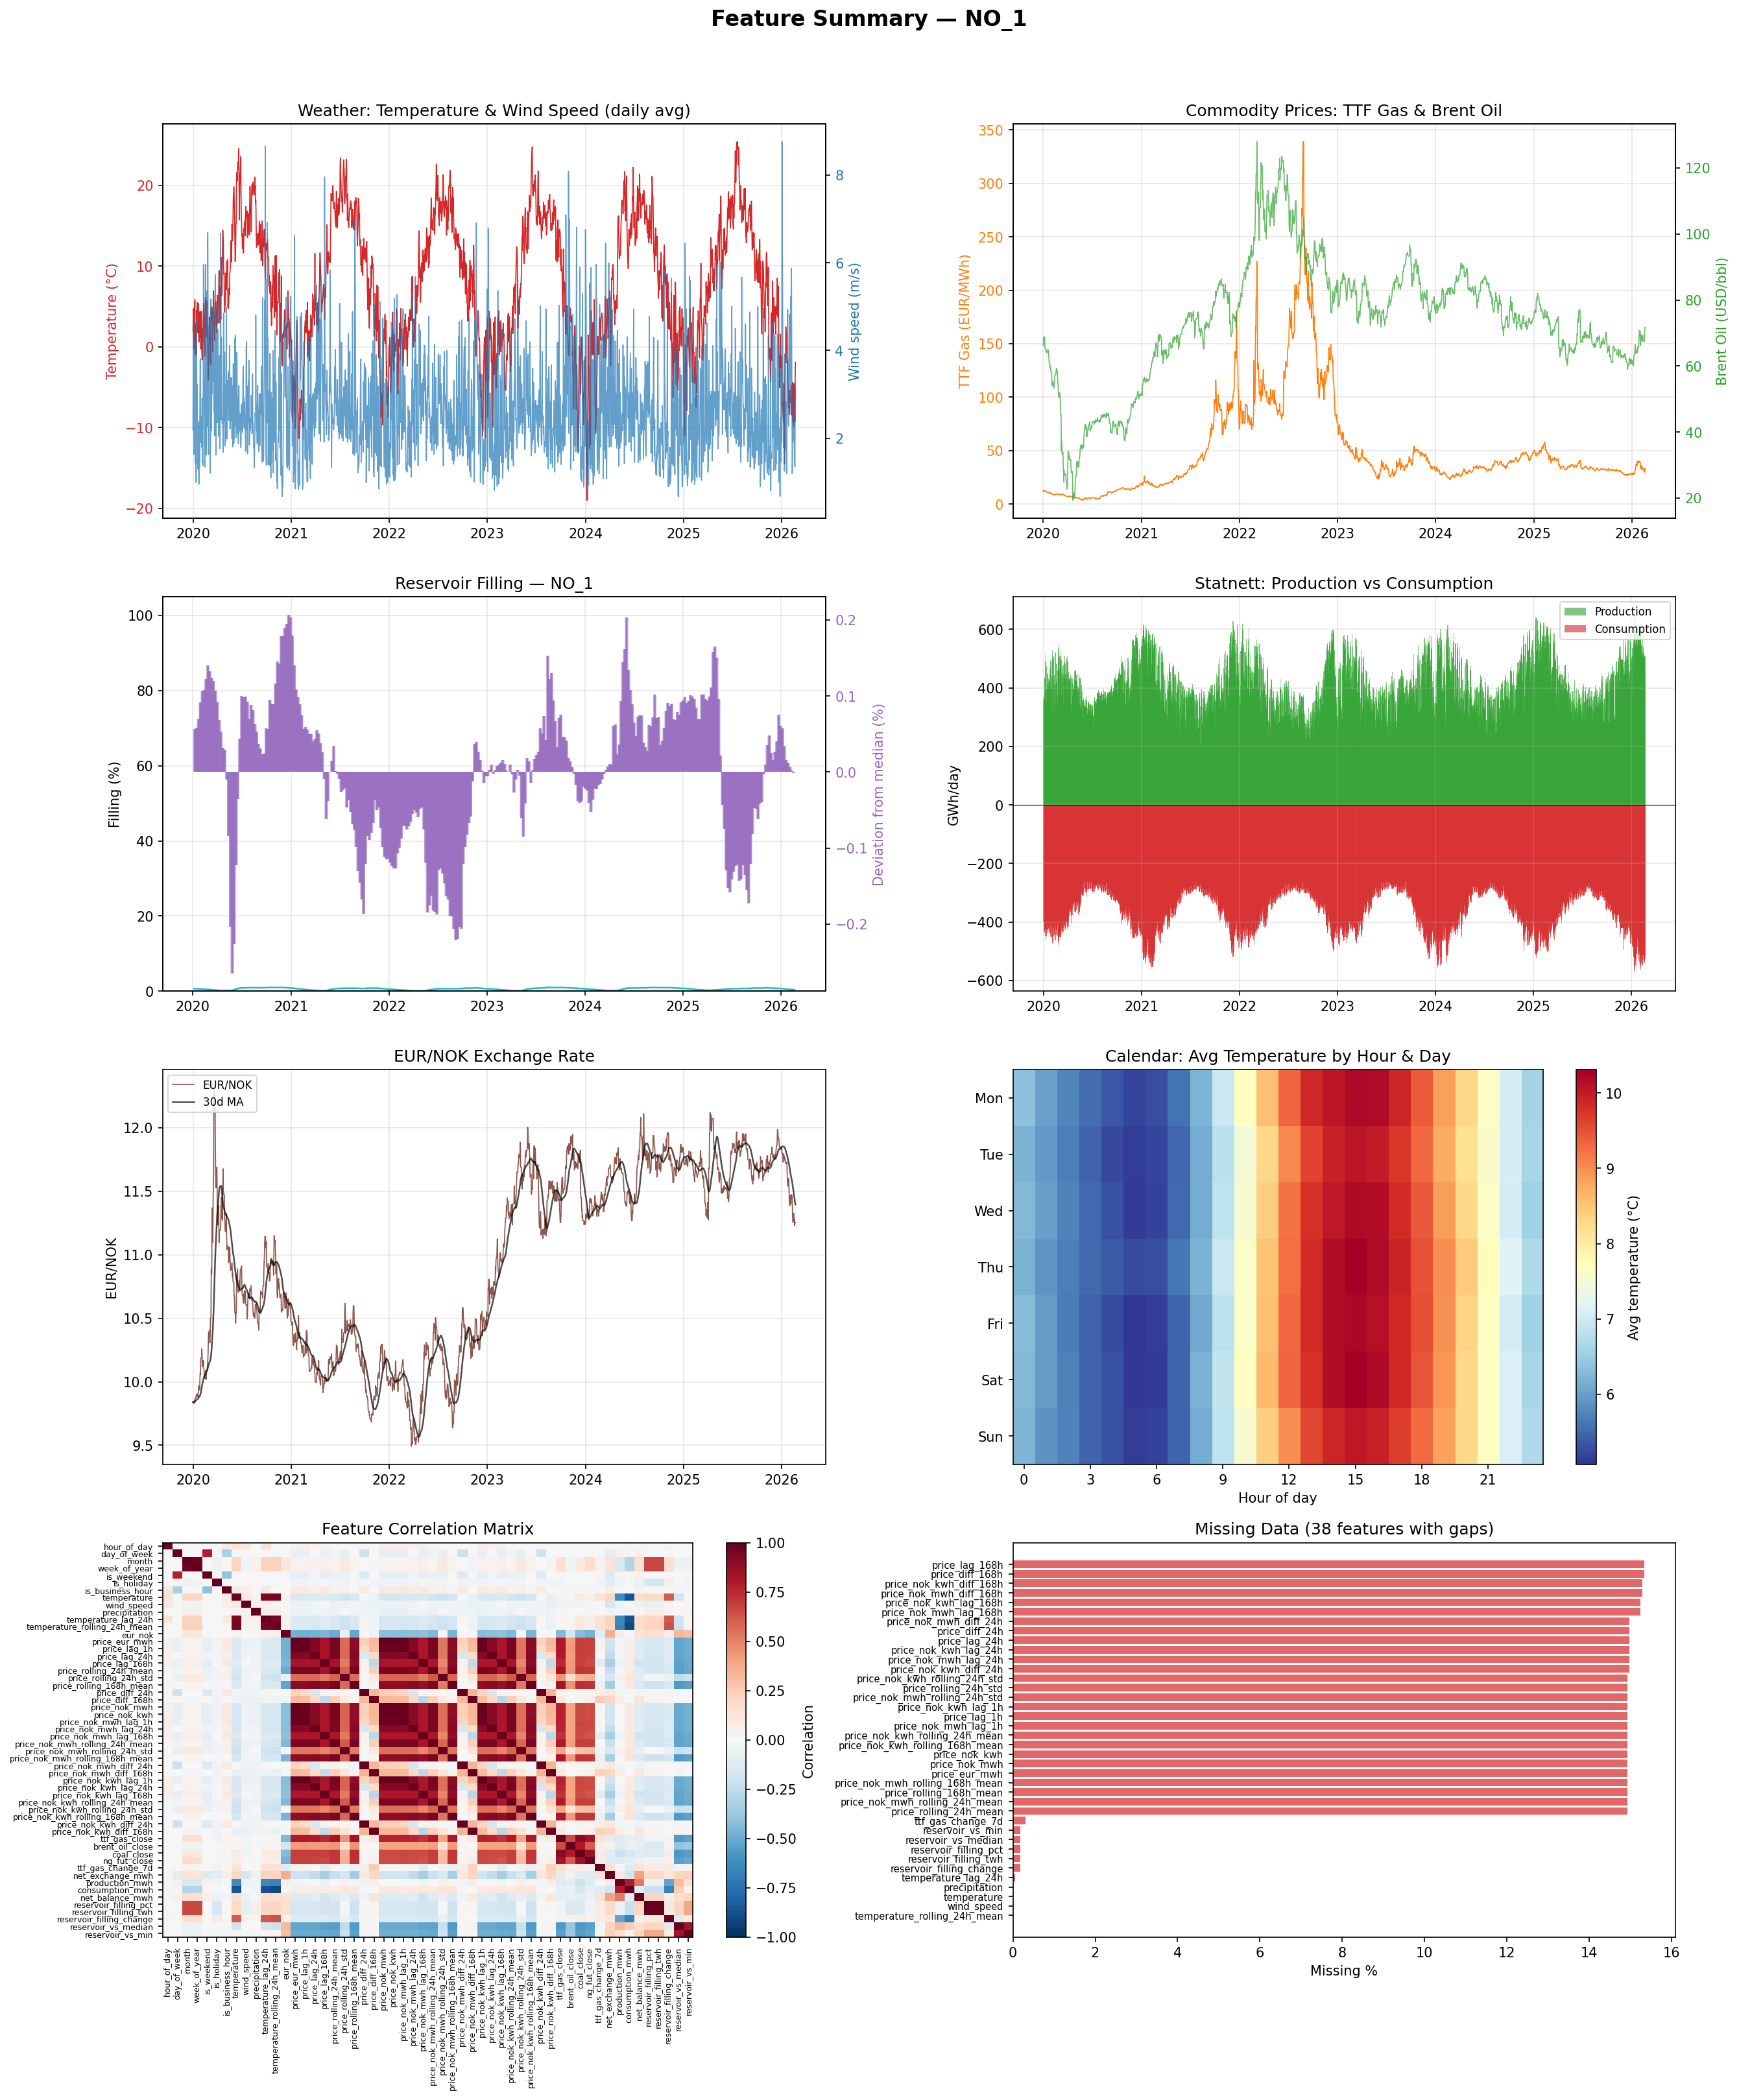


NO_2 — Sør-Norge (Kristiansand)


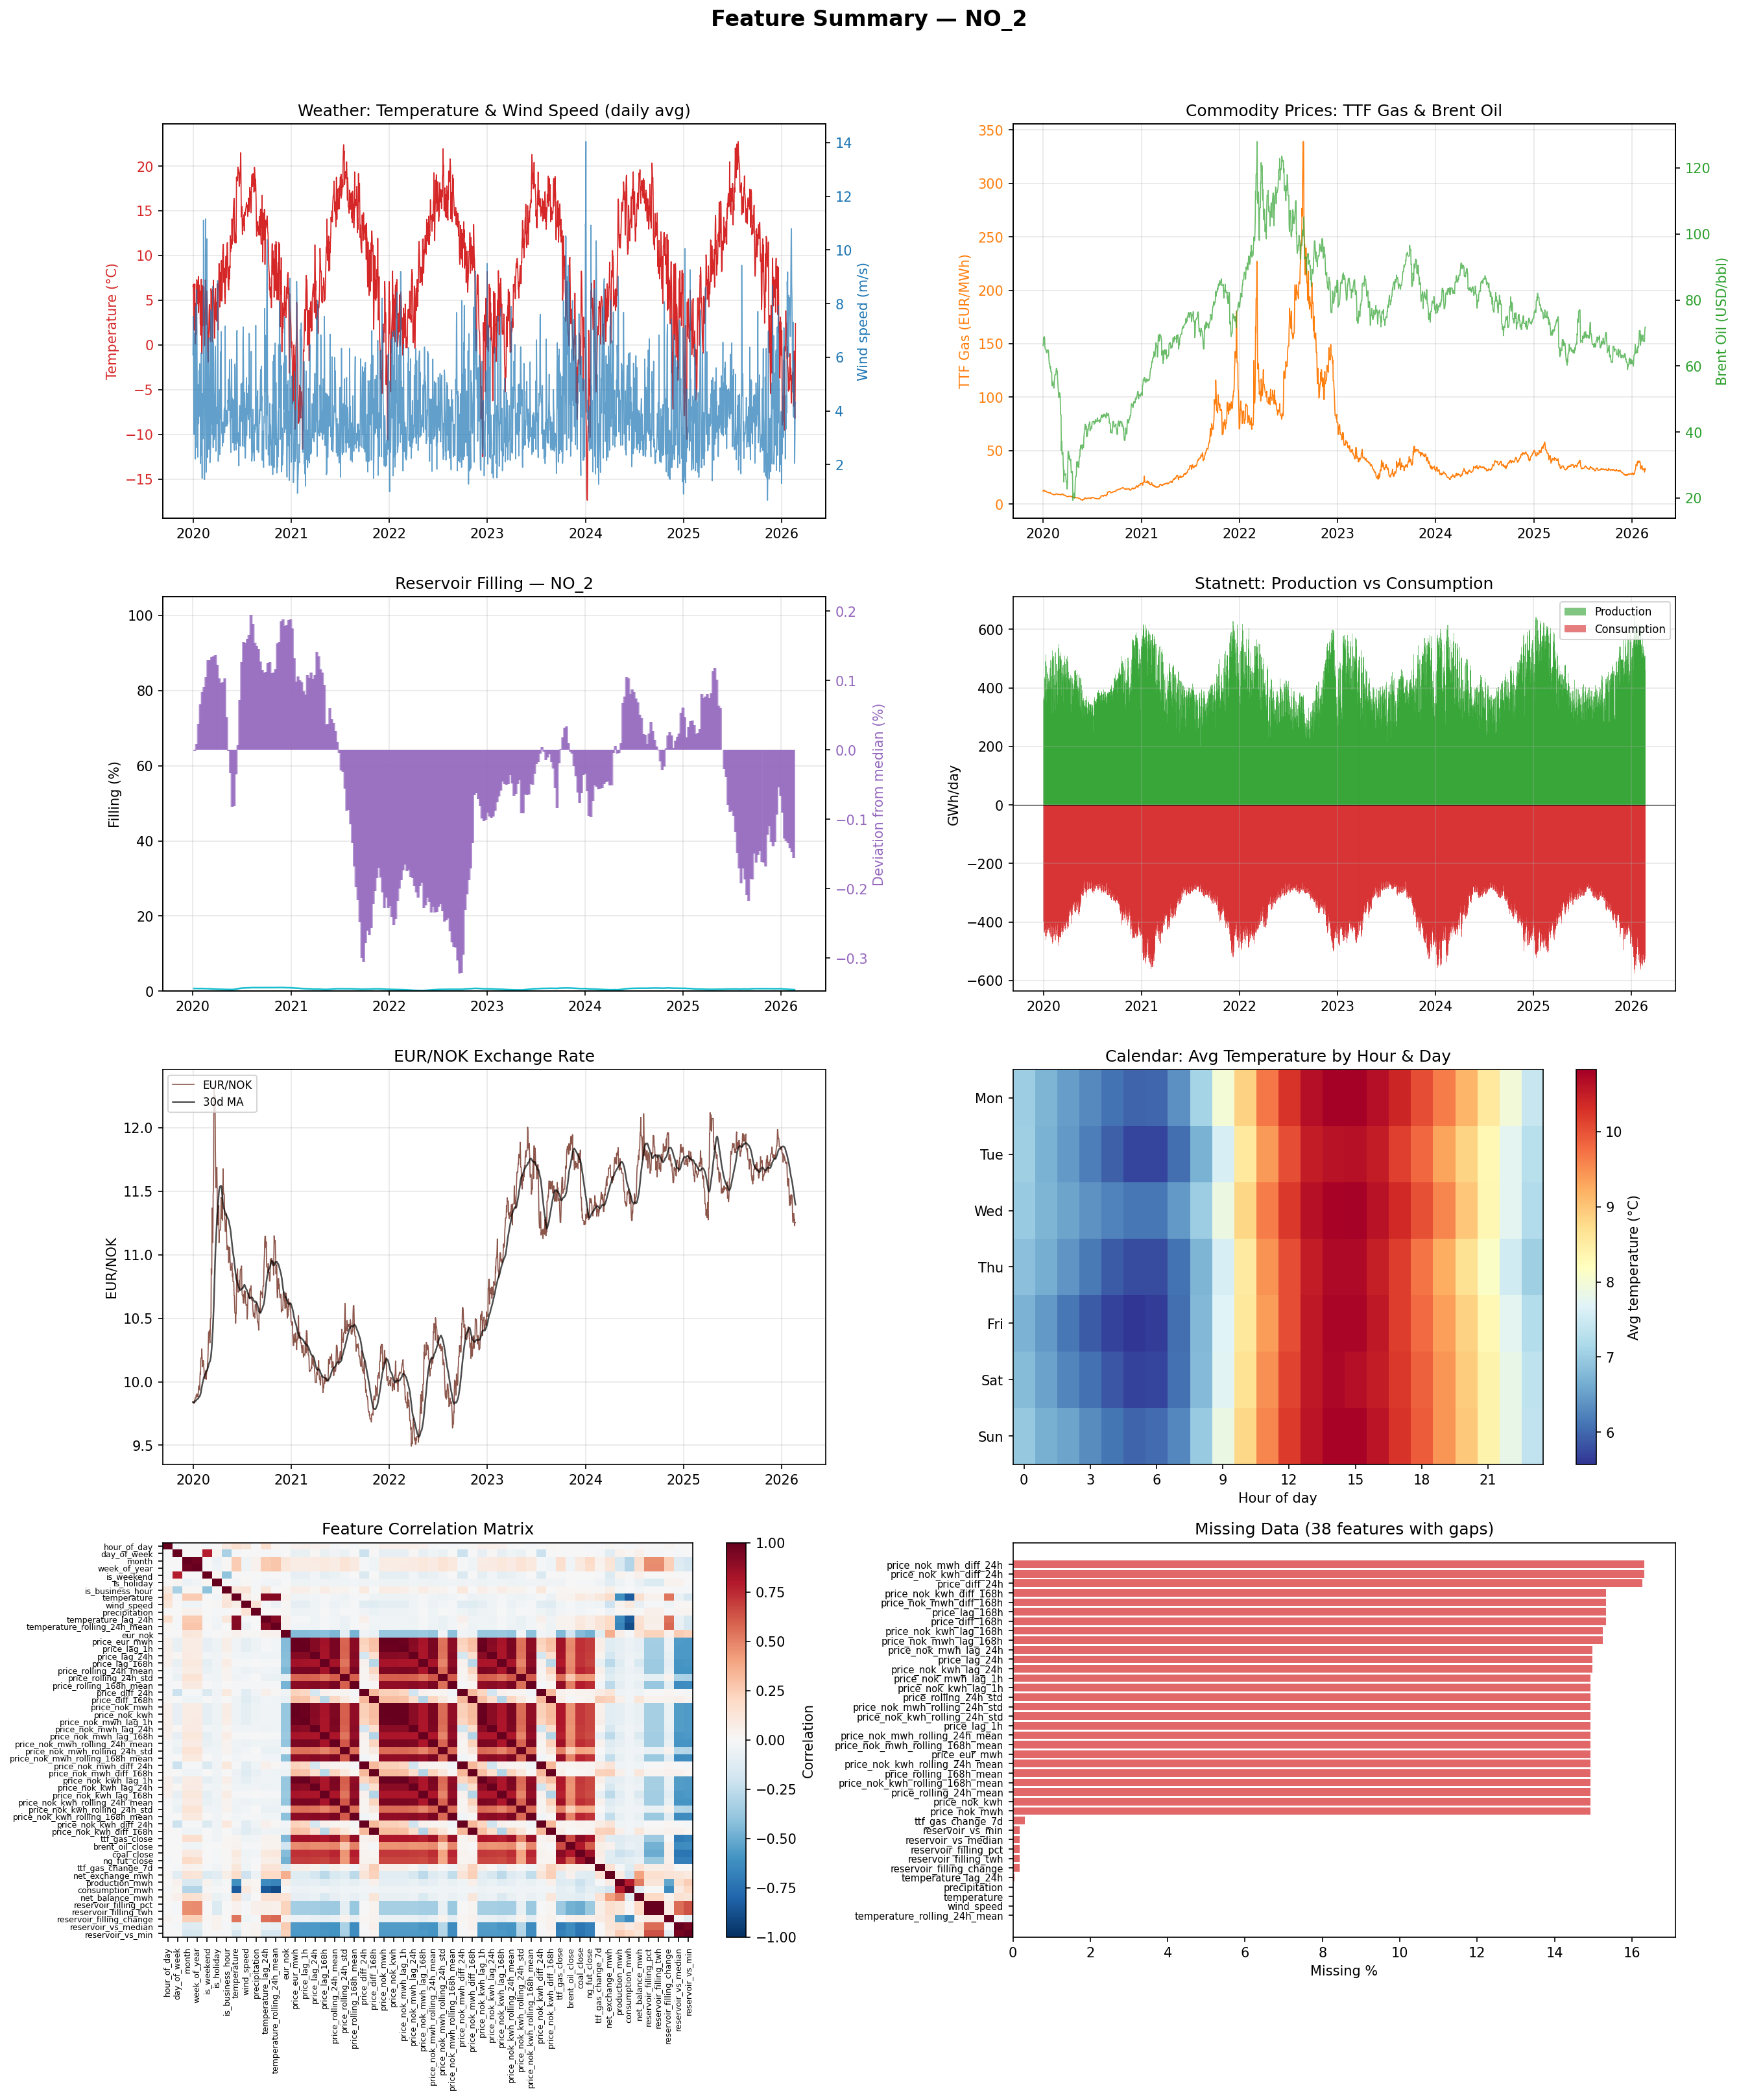


NO_3 — Midt-Norge (Trondheim)


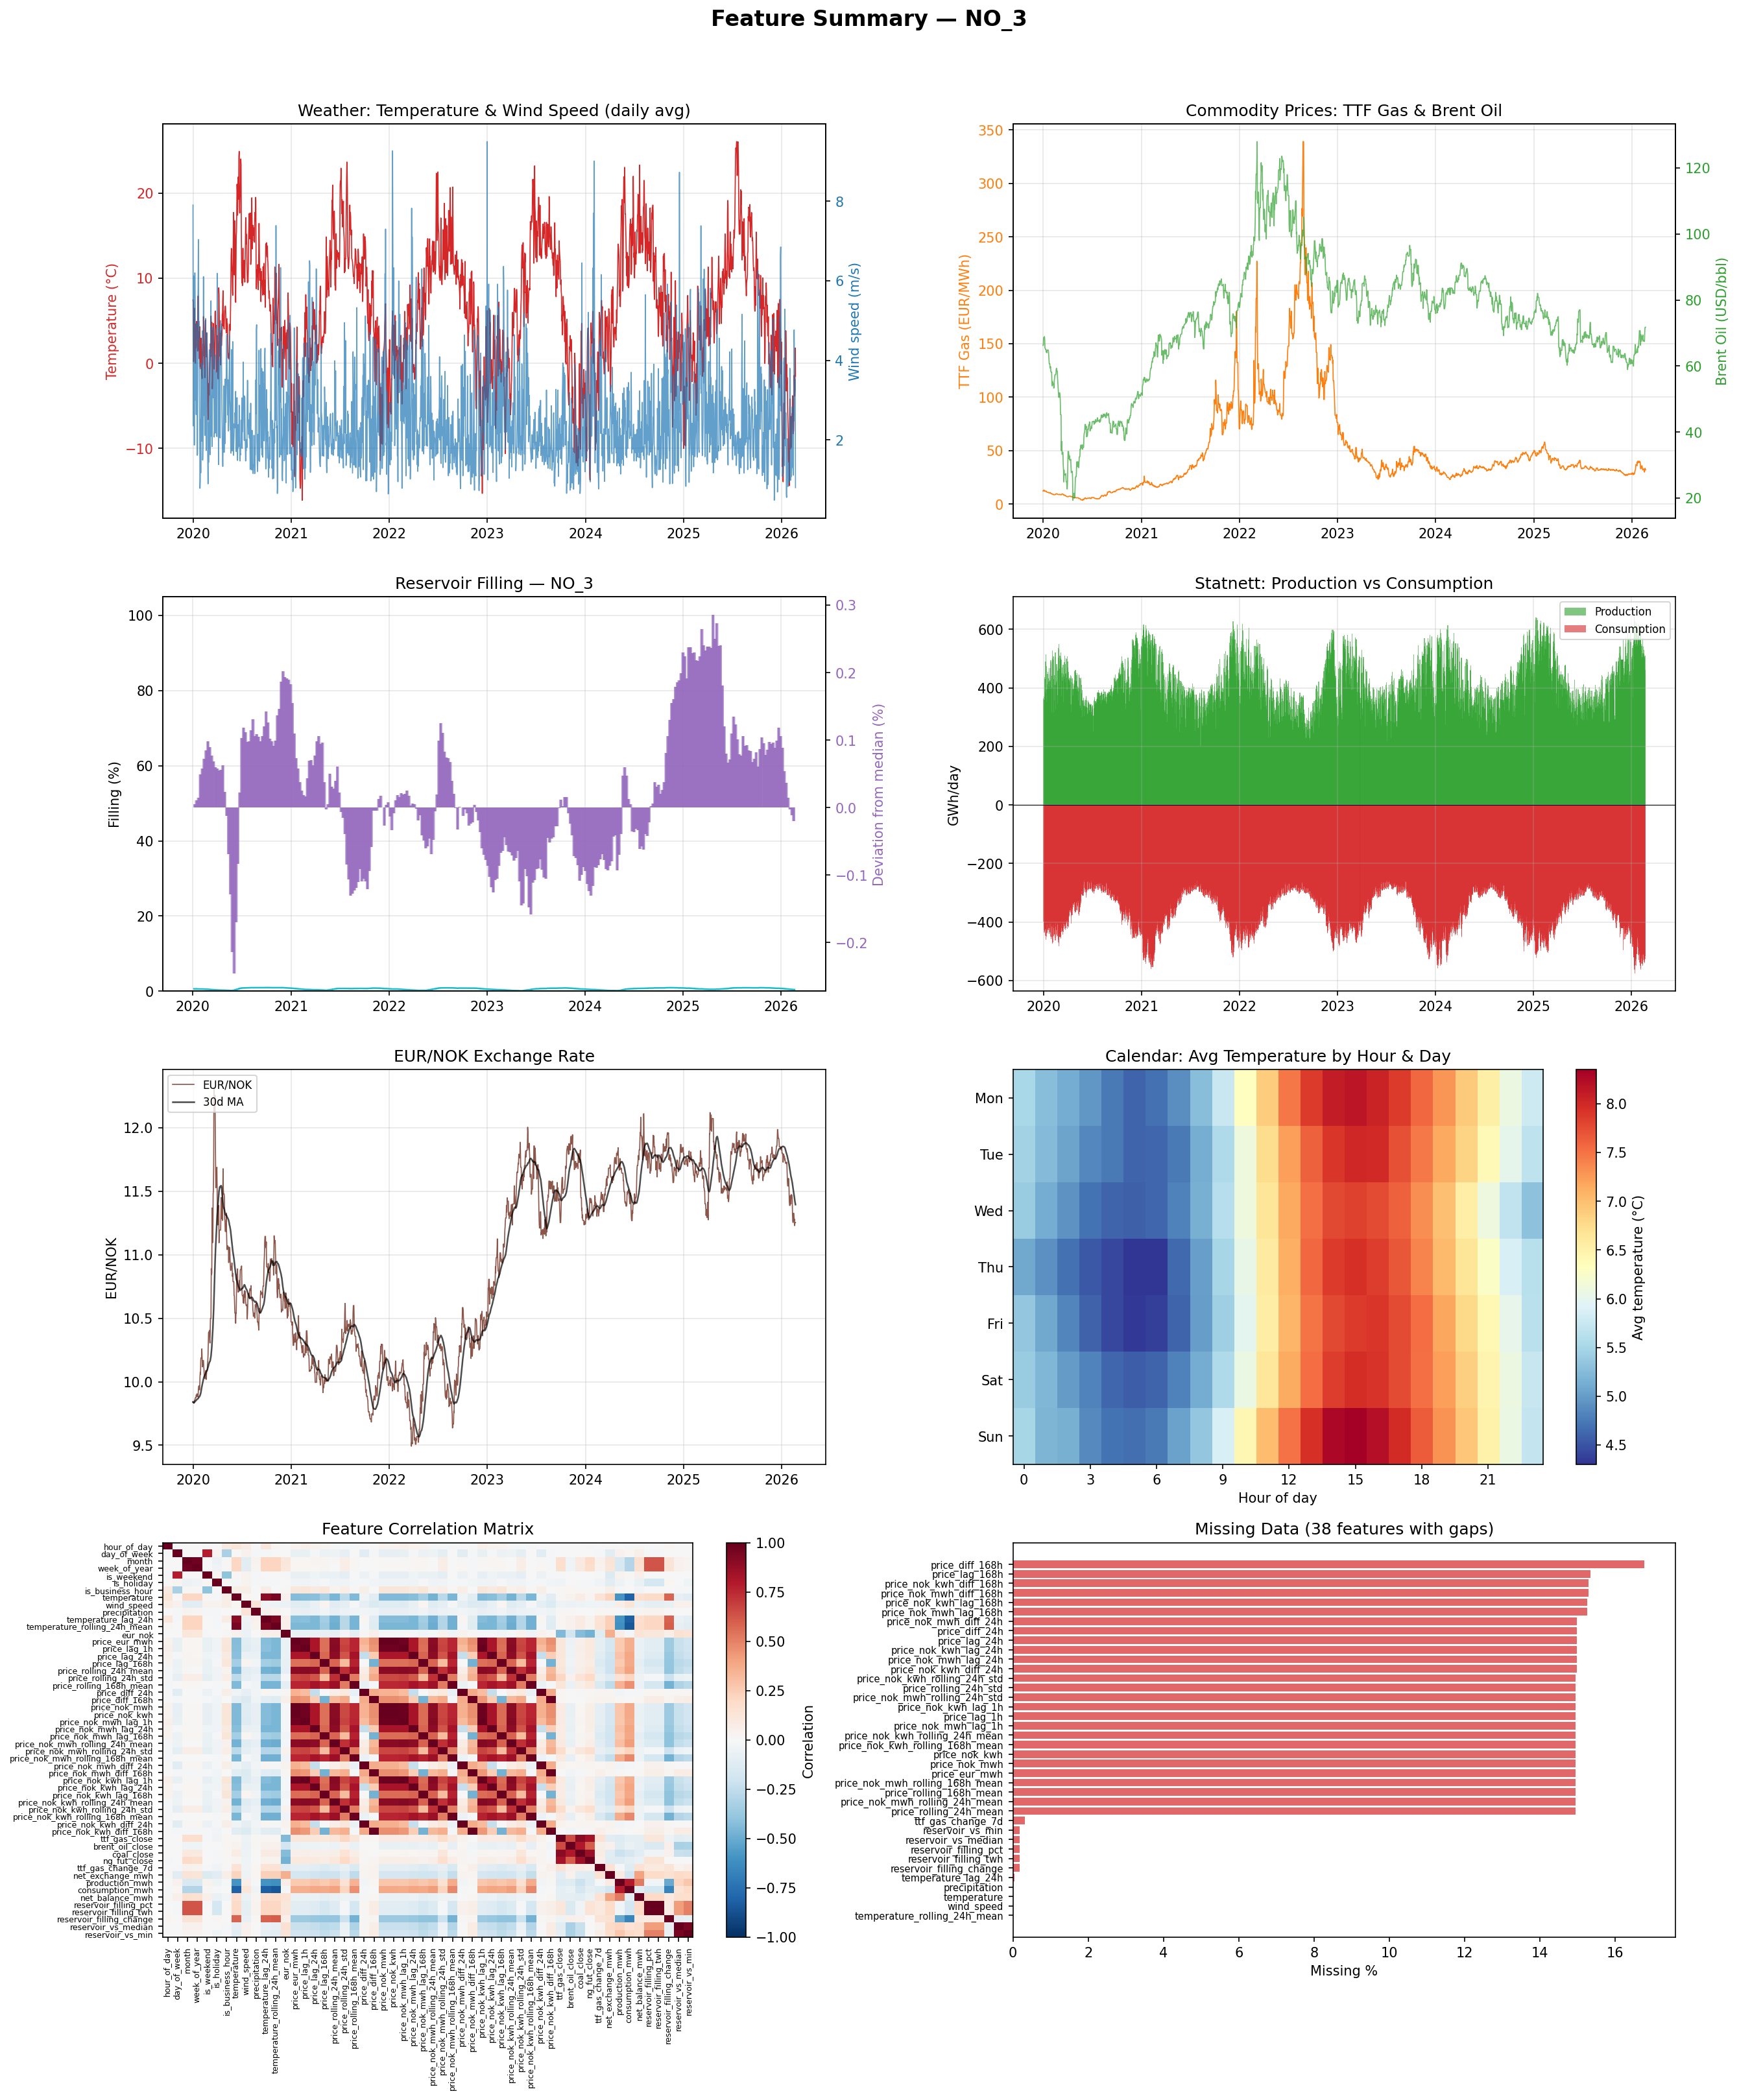


NO_4 — Nord-Norge (Tromsø)


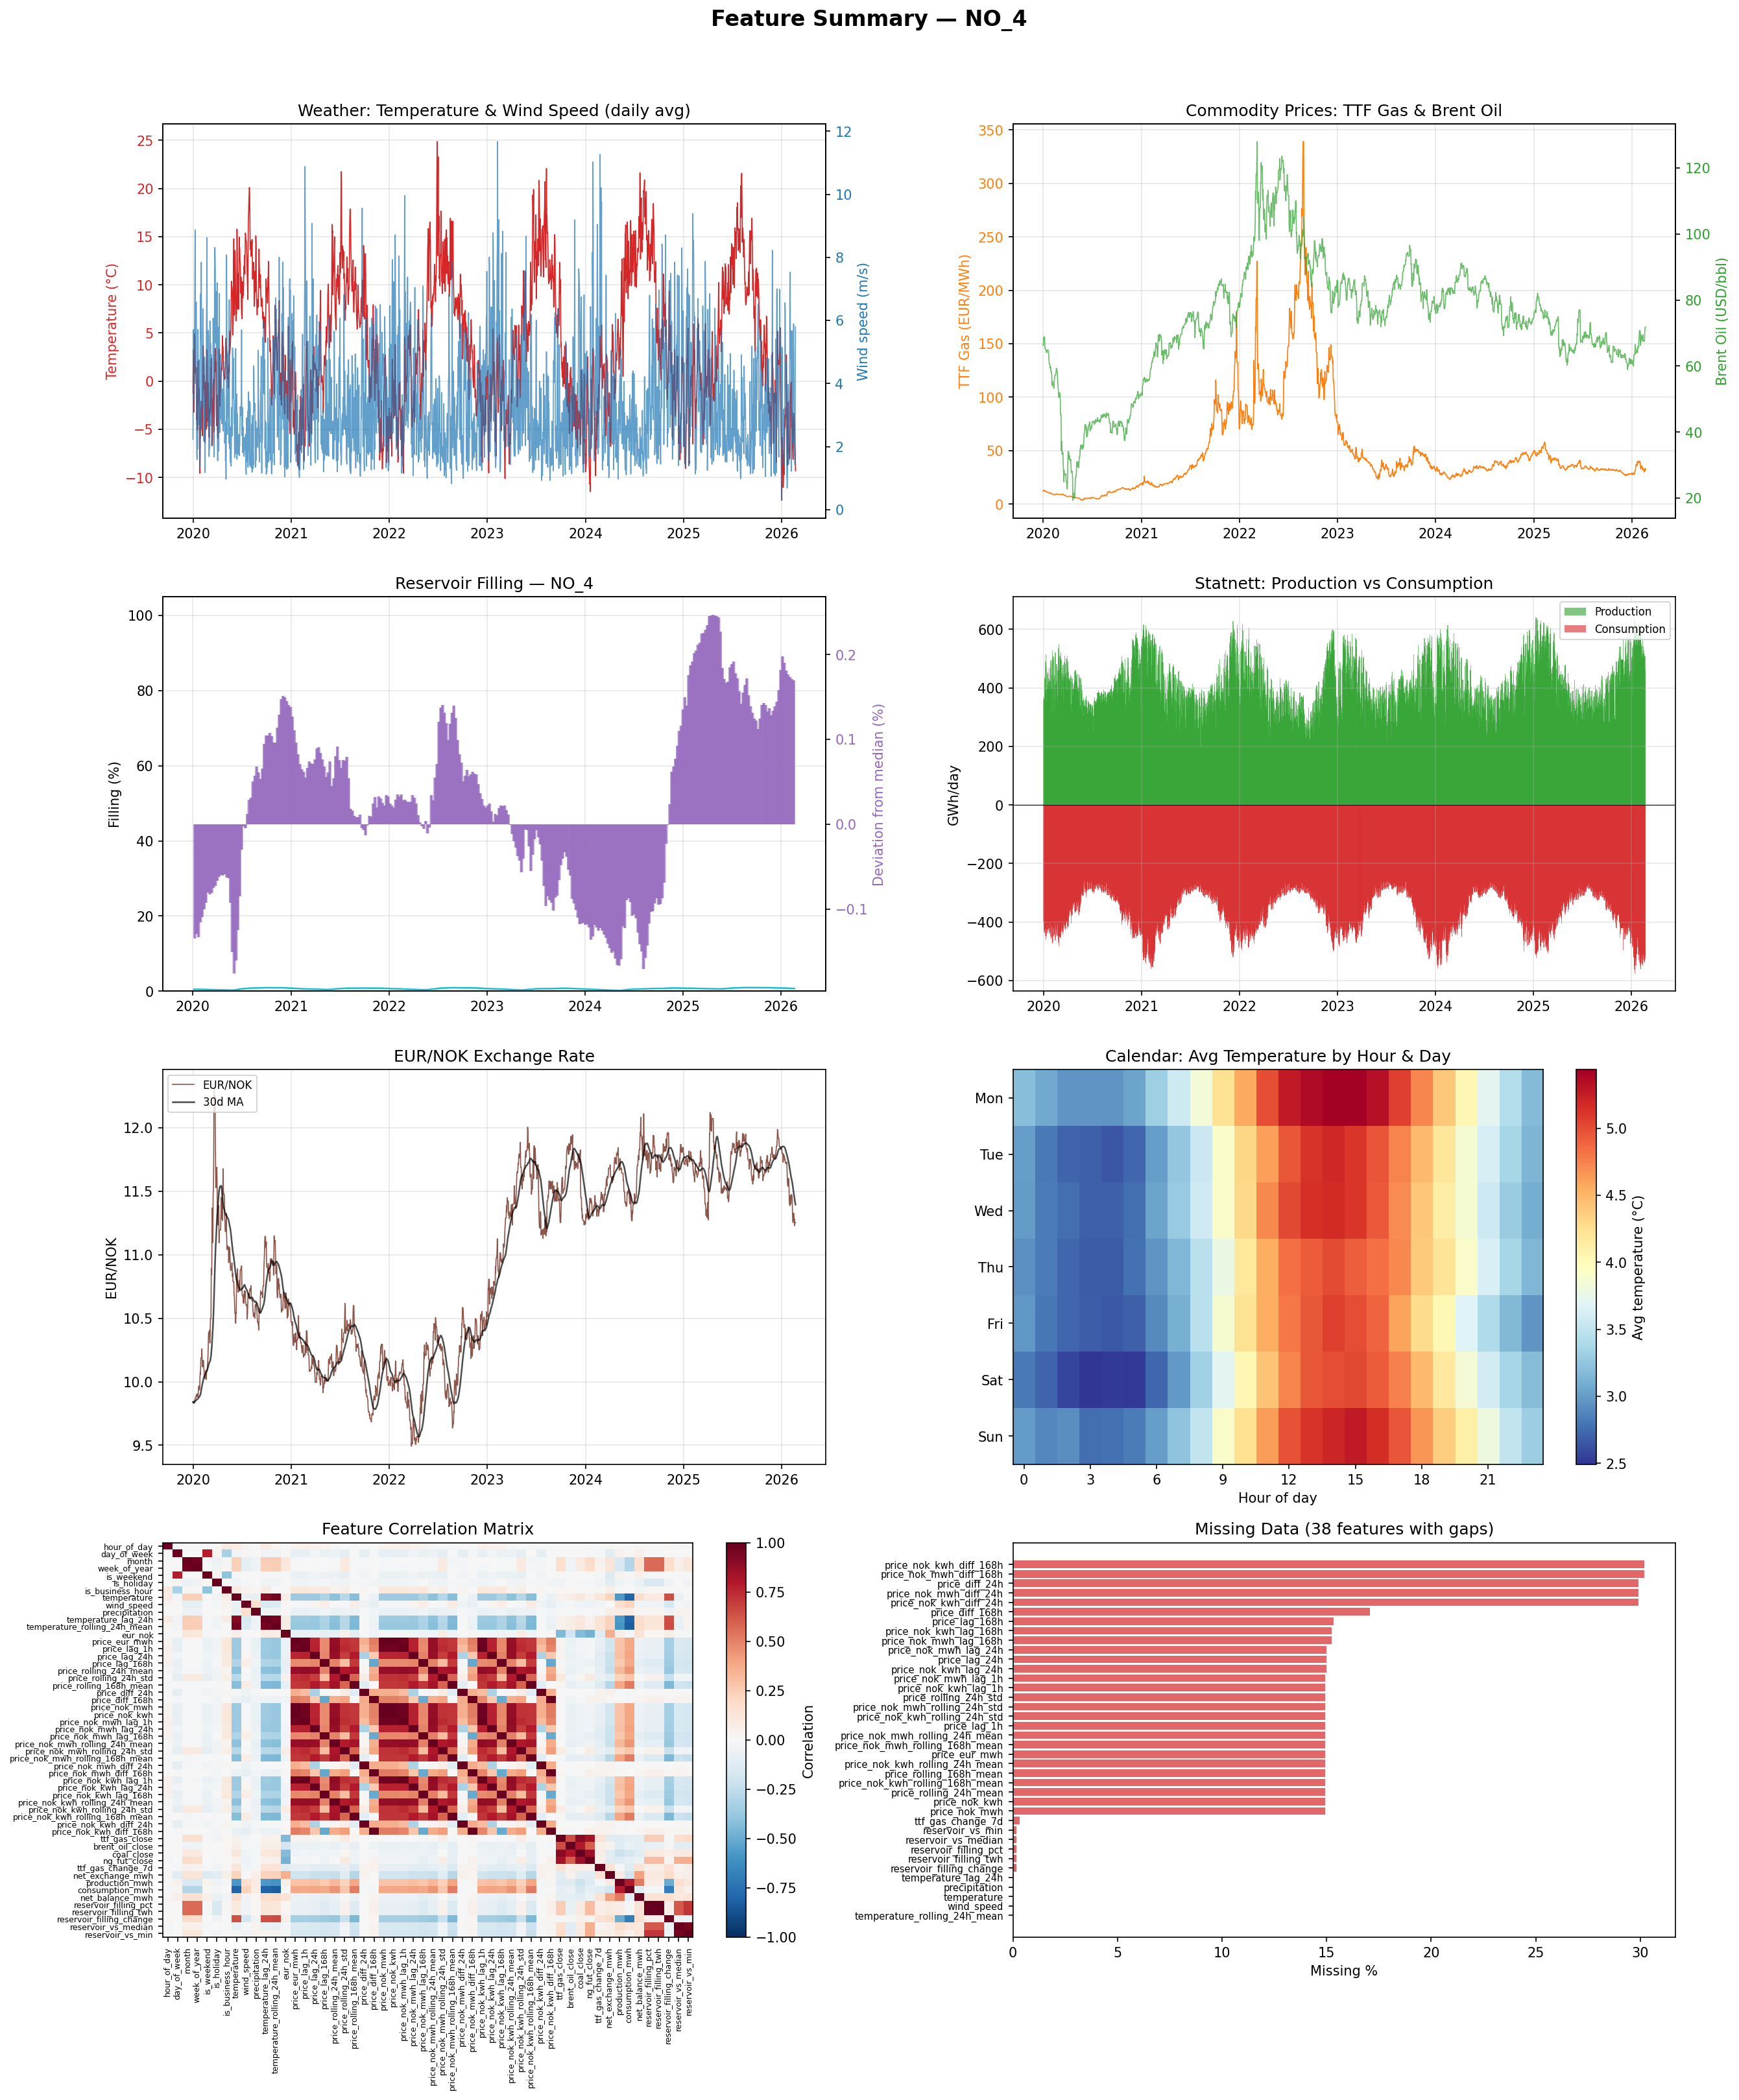


NO_5 — Vest-Norge (Bergen)


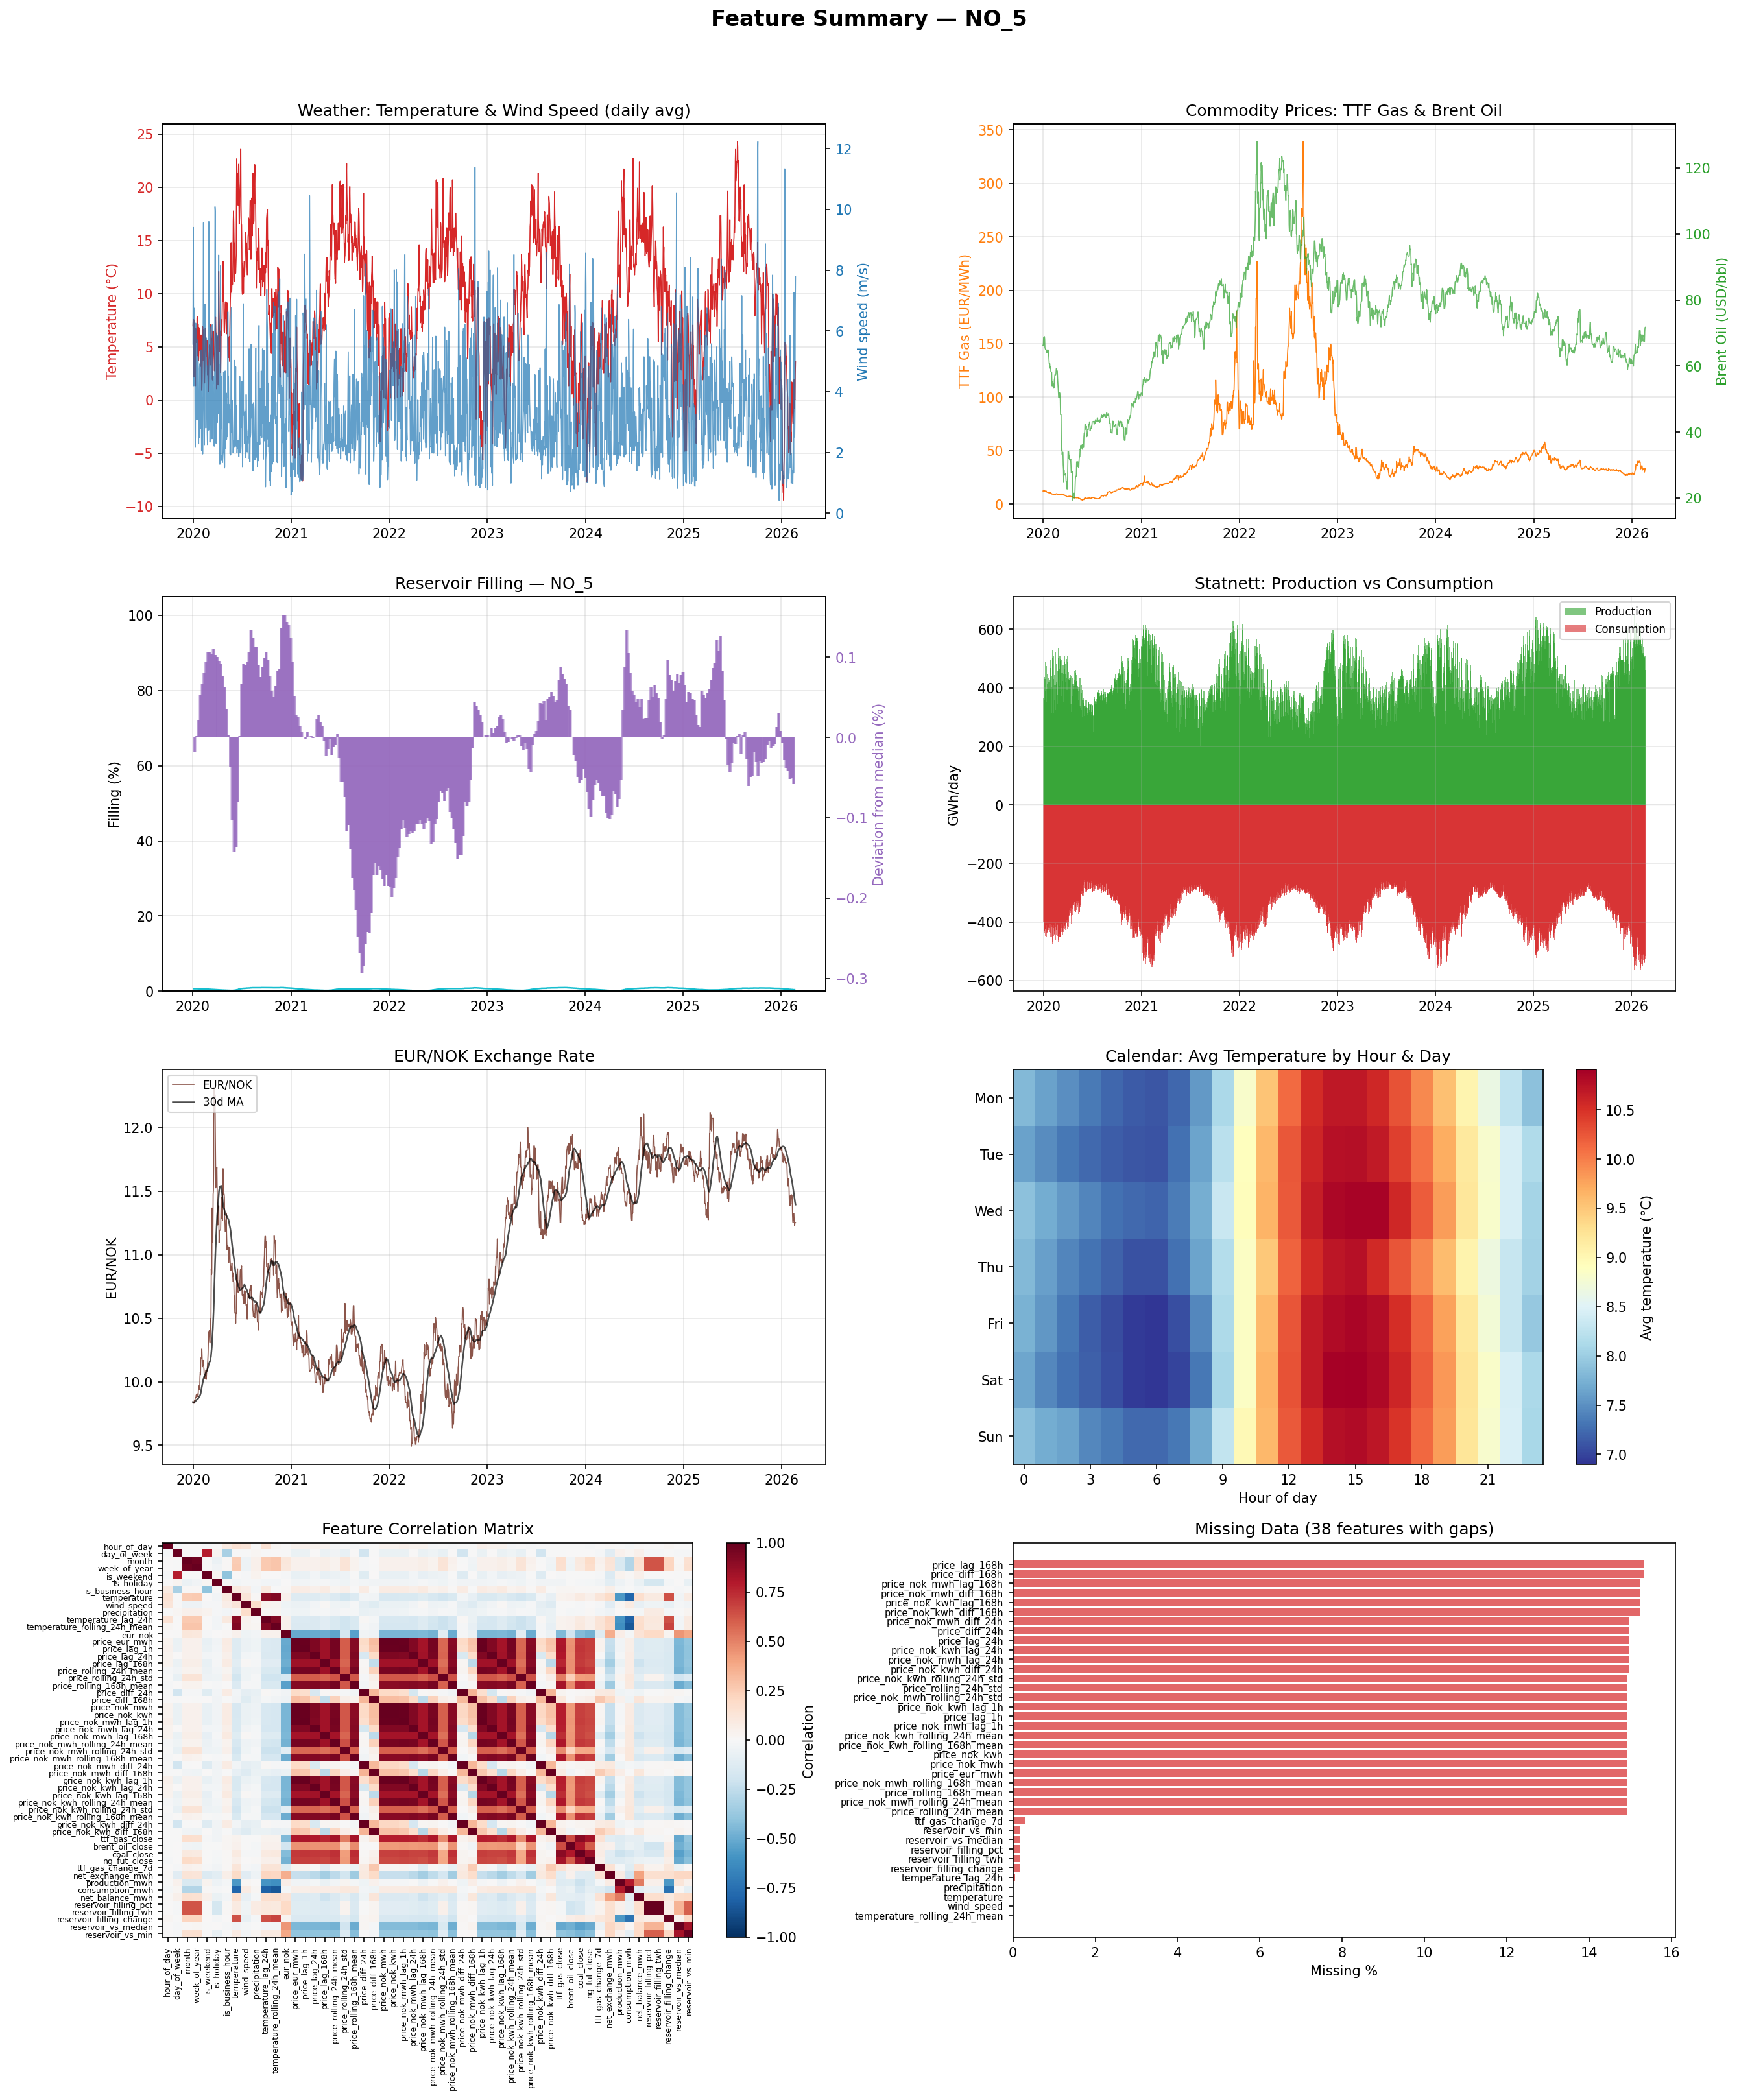

In [6]:
from IPython.display import Image, display

artifacts_dir = Path("../artifacts")
for zone in all_dfs:
    plot_path = artifacts_dir / f"feature_summary_{zone}.png"
    if plot_path.exists():
        print(f"\n{'='*60}")
        print(f"{zone} — {ZONE_LABELS[zone]}")
        print(f"{'='*60}")
        display(Image(filename=str(plot_path), width=800))

## Done!

All 5 zone feature matrices are built and cached. You can now:
- Load any zone with `pd.read_parquet(f"../data/processed/features_{zone}_{START}_{END}.parquet")`
- Proceed to **06_zone_comparison** for cross-zone analysis
- Proceed to **Phase 3** (baseline models) when ready